# Lead Score Case Study

In [1]:
#import necessary libraries
import pandas as pd
import numpy as np

#import visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="whitegrid")

#import stats library
from scipy import stats
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

#import sklearn libraries
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report,recall_score,roc_auc_score,roc_curve,accuracy_score,precision_score,precision_recall_curve,confusion_matrix
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_selection import RFE


#import miscellaneous libraries
pd.set_option("display.max_columns",None)
pd.set_option("display.max_colwidth",200)

#import warning library
import warnings
warnings.filterwarnings("ignore")

## 1. Data Reading and Understanding 

In [2]:
#importing the data

df = pd.read_csv('Leads.csv')

In [3]:
#checking top few rows

df.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,How did you hear about X Education,What is your current occupation,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Lead Quality,Update me on Supply Chain Content,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,NaN,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Interested in other courses,Low in Relevance,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,India,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,NaN,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,India,Business Administration,Select,Student,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,India,Media and Advertising,Word Of Mouth,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,Not Sure,No,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,India,Select,Other,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [4]:
# print shape of the dataframe
print ('The df data has {0} rows and {1} columns'.format(df.shape[0],df.shape[1]))

The df data has 9240 rows and 37 columns


In [5]:
#checking the info

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

In [6]:
#checking for duplicates

df[df.duplicated()]

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,How did you hear about X Education,What is your current occupation,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Lead Quality,Update me on Supply Chain Content,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity


In [7]:
#checking the spread of the data

df.describe()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
count,9240.000000,9240.000000,9103.000000,9240.000000,9103.000000,5022.000000,5022.000000
mean,617188.435606,0.385390,3.445238,487.698268,2.362820,14.306252,16.344883
std,23405.995698,0.486714,4.854853,548.021466,2.161418,1.386694,1.811395
min,579533.000000,0.000000,0.000000,0.000000,0.000000,7.000000,11.000000
25%,596484.500000,0.000000,1.000000,12.000000,1.000000,14.000000,15.000000
50%,615479.000000,0.000000,3.000000,248.000000,2.000000,14.000000,16.000000
75%,637387.250000,1.000000,5.000000,936.000000,3.000000,15.000000,18.000000
max,660737.000000,1.000000,251.000000,2272.000000,55.000000,18.000000,20.000000


In [8]:
df.describe(include = ['object'])

,Prospect ID,Lead Origin,Lead Source,Do Not Email,Do Not Call,Last Activity,Country,Specialization,How did you hear about X Education,What is your current occupation,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Lead Quality,Update me on Supply Chain Content,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
count,9240,9240,9204,9240,9240,9137,6779,7802,7033,6550,6531,9240,9240,9240,9240,9240,9240,9240,9240,5887,4473,9240,9240,6531,7820,5022,5022,9240,9240,9240
unique,9240,5,21,2,2,17,38,19,10,6,3,2,1,2,2,2,2,2,1,26,5,1,1,6,7,3,3,1,2,16
top,7927b2df-8bba-4d29-b9a2-b6e0beafe620,Landing Page Submission,Google,No,No,Email Opened,India,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Select,Mumbai,02.Medium,02.Medium,No,No,Modified
freq,1,4886,2868,8506,9238,3437,6492,1942,5043,5600,6528,9226,9240,9238,9239,9239,9236,9233,9240,2072,1560,9240,9240,4146,3222,3839,2788,9240,6352,3407


__It has been noted that many columns only have one distinct value. As a result, these columns provide no help in identifying hot leads.__

In [9]:
df.nunique()

Prospect ID                                      9240
Lead Number                                      9240
Lead Origin                                         5
Lead Source                                        21
Do Not Email                                        2
Do Not Call                                         2
Converted                                           2
TotalVisits                                        41
Total Time Spent on Website                      1731
Page Views Per Visit                              114
Last Activity                                      17
Country                                            38
Specialization                                     19
How did you hear about X Education                 10
What is your current occupation                     6
What matters most to you in choosing a course       3
Search                                              2
Magazine                                            1
Newspaper Article           

## 2. Data Cleaning

### 2.1 Handling Delimiters

In [10]:
# Handling the delimiters (.) in coloumn Asymmetrique Activity Index and Asymmetrique Profile Index

df['Asymmetrique Activity Index'] = df["Asymmetrique Activity Index"].fillna('').str.split(".").str[1]
df['Asymmetrique Profile Index'] = df["Asymmetrique Profile Index"].fillna('').str.split(".").str[1]
df.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,How did you hear about X Education,What is your current occupation,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Lead Quality,Update me on Supply Chain Content,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,NaN,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Interested in other courses,Low in Relevance,No,No,Select,Select,Medium,Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,India,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,NaN,No,No,Select,Select,Medium,Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,India,Business Administration,Select,Student,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Potential Lead,Mumbai,Medium,High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,India,Media and Advertising,Word Of Mouth,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,Not Sure,No,No,Select,Mumbai,Medium,High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,India,Select,Other,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Select,Mumbai,Medium,High,15.0,18.0,No,No,Modified


### 2.2 Dropping Columns

In [11]:
# Dropping unecessary columns that have only one unique values for all the leads.

cols = []
for i in df.columns:
    if df[i].nunique() ==1:
        cols.append(i)
df.drop(cols, axis =1, inplace = True)
df.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,How did you hear about X Education,What is your current occupation,What matters most to you in choosing a course,Search,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Tags,Lead Quality,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,NaN,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,Interested in other courses,Low in Relevance,Select,Select,Medium,Medium,15.0,15.0,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,India,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,Ringing,NaN,Select,Select,Medium,Medium,15.0,15.0,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,India,Business Administration,Select,Student,Better Career Prospects,No,No,No,No,No,No,Will revert after reading the email,Might be,Potential Lead,Mumbai,Medium,High,14.0,20.0,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,India,Media and Advertising,Word Of Mouth,Unemployed,Better Career Prospects,No,No,No,No,No,No,Ringing,Not Sure,Select,Mumbai,Medium,High,13.0,17.0,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,India,Select,Other,Unemployed,Better Career Prospects,No,No,No,No,No,No,Will revert after reading the email,Might be,Select,Mumbai,Medium,High,15.0,18.0,No,Modified


In [12]:
# Dropping Prospect ID as these are only a representation of the Contacted Person's ID number.
# Prospect ID and Lead Number both have distinct values. We'll continue to use Lead Number to identify the lead..

df = df.drop(['Prospect ID'], 1)
df.head()

,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,How did you hear about X Education,What is your current occupation,What matters most to you in choosing a course,Search,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Tags,Lead Quality,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,A free copy of Mastering The Interview,Last Notable Activity
0,660737,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,NaN,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,Interested in other courses,Low in Relevance,Select,Select,Medium,Medium,15.0,15.0,No,Modified
1,660728,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,India,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,Ringing,NaN,Select,Select,Medium,Medium,15.0,15.0,No,Email Opened
2,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,India,Business Administration,Select,Student,Better Career Prospects,No,No,No,No,No,No,Will revert after reading the email,Might be,Potential Lead,Mumbai,Medium,High,14.0,20.0,Yes,Email Opened
3,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,India,Media and Advertising,Word Of Mouth,Unemployed,Better Career Prospects,No,No,No,No,No,No,Ringing,Not Sure,Select,Mumbai,Medium,High,13.0,17.0,No,Modified
4,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,India,Select,Other,Unemployed,Better Career Prospects,No,No,No,No,No,No,Will revert after reading the email,Might be,Select,Mumbai,Medium,High,15.0,18.0,No,Modified


<AxesSubplot:xlabel='Asymmetrique Activity Score', ylabel='count'>

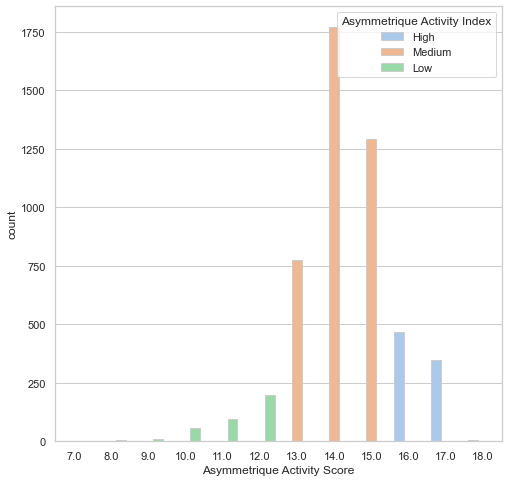

In [13]:
## Let us now observe the index and score assigned to each customer based on their activity and their profile

plt.figure(figsize = (8,8))

sns.countplot(x = 'Asymmetrique Activity Score', hue ='Asymmetrique Activity Index', data = df, palette="pastel", edgecolor=".8",hue_order=['High','Medium','Low'])

__The following points can be seen in the above plot:__
- Lead with Asymmetrique Activity Score from 7 to 12 fall in the category of Low Asymmetrique Activity Index.
- Lead with Asymmetrique Activity Score of 13, 14 & 15 fall in the category of Medium Asymmetrique Activity Index.
- Lead with Asymmetrique Activity Score of 16, 17 & 18 fall in the category of High Asymmetrique Activity Index.


<AxesSubplot:xlabel='Asymmetrique Profile Score', ylabel='count'>

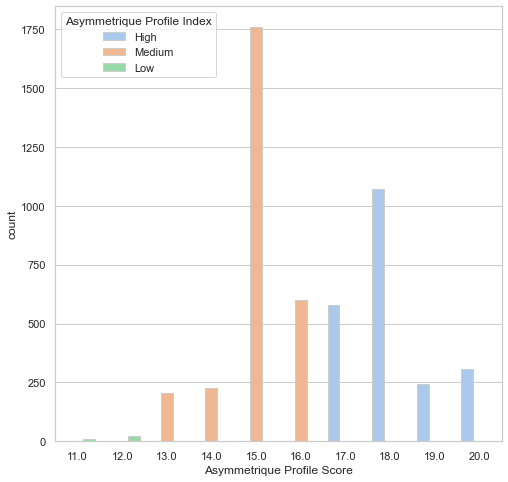

In [14]:
# Let's inspect the index and score each customer receives depending on their activity and profile.

plt.figure(figsize = (8,8))

sns.countplot(x = 'Asymmetrique Profile Score', hue ='Asymmetrique Profile Index', data = df, palette="pastel", edgecolor=".8",hue_order=['High','Medium','Low'])

__The following points can be seen in the above plot:__
- Leads with Asymmetrique Profile Score of 11 & 12 fall in the category of Low Asymmetrique Profile Index.
- Leads with Asymmetrique Profile Score of 13, 14, 15 & 16 fall in the category of Medium Asymmetrique Profile Index.
- Leads with Asymmetrique Profile Score of 17, 18, 19 & 20 fall in the category of High Asymmetrique Profile Index

__The Asymmetrique Activity Score and Asymmetrique Profile score columns are well defined by two other columns, Asymmetrique Activity Index and Asymmetrique Profile Index, respectively, according to the preceding plots. Therefore, we can eliminate these two columns from our dataset.__

In [15]:
# Dropping 'Asymmetrique Activity Score' & 'Asymmetrique Profile Score'

cols = ['Asymmetrique Activity Score','Asymmetrique Profile Score']

df.drop(cols, axis = 1, inplace = True)

In [16]:
# checking shape

df.shape

(9240, 29)

### 2.3 Handling the Leads' uncertain values

__We can see that our dataset contains a large number of columns with values of "Select." This is because the consumer did not choose any option from the list, thus it still says select. There are two possible reasons why it was left unselected.__
- Lack of options led to uncertainty because there weren't enough options available. Therefore, this can be imputed to Others.
- Data entry is incorrect. Since any other way of imputation will cause the data to be disturbed, it is preferable to impute them as NaN.

In [17]:
# Columns having select values

df.columns[df.isin(['Select']).any()]

Index(['Specialization', 'How did you hear about X Education', 'Lead Profile',
       'City'],
      dtype='object')

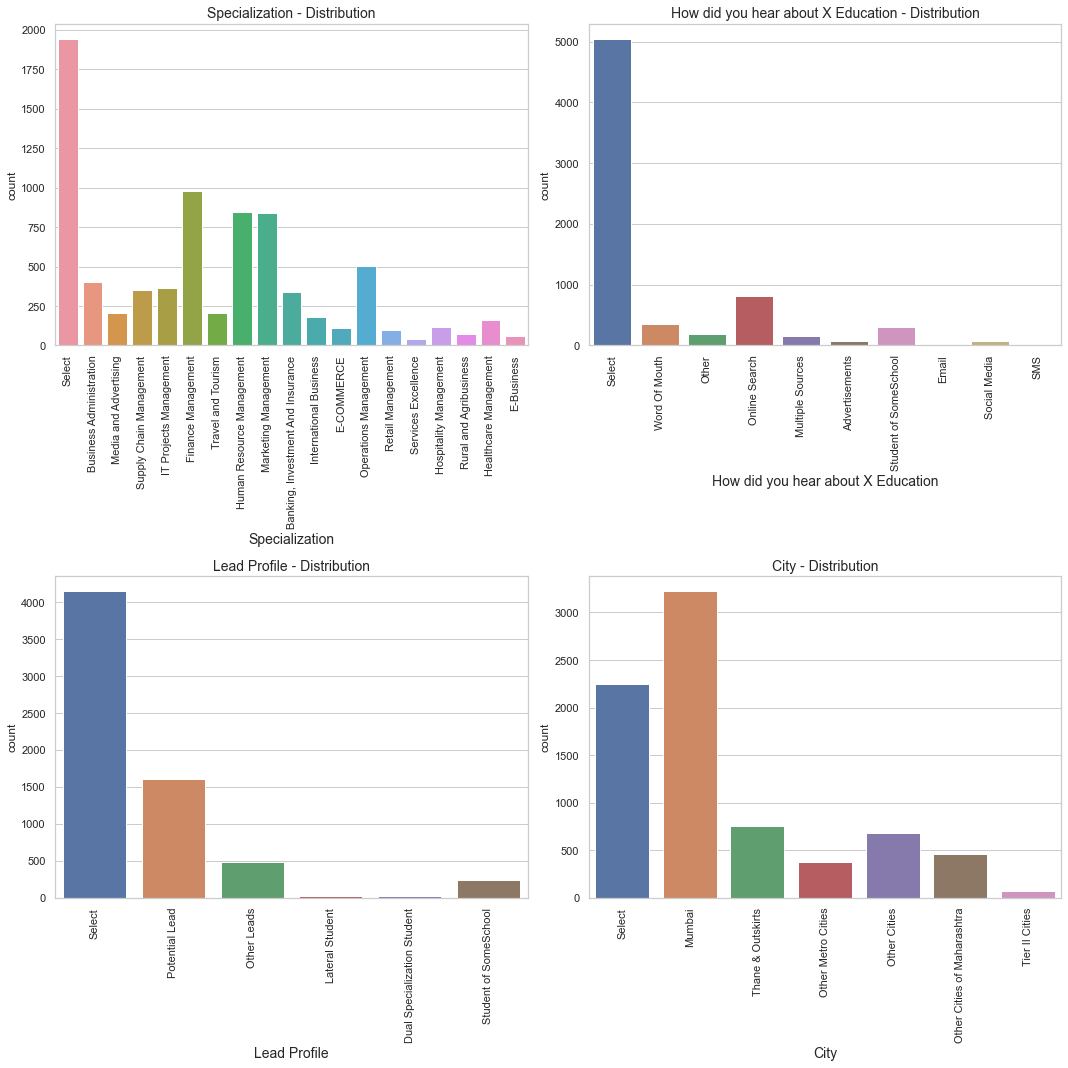

In [18]:
def countplot(x, fig):
    plt.subplot(2,2, fig)
    sns.countplot(df[x])
    plt.title(x+' - Distribution', size = 14)
    plt.xlabel(x,size = 14)
    plt.xticks(rotation = 90)

plt.figure(figsize=(15,15))

countplot('Specialization',1)
countplot('How did you hear about X Education',2)
countplot('Lead Profile',3)
countplot('City',4)

plt.tight_layout()

__The number of distinct values in each of the three columns is displayed in these charts. We can see that the selected category has the highest counts across all three columns. Let's impute each column with this select value.__

In [19]:
# Consider Specialization column

df['Specialization'].value_counts()

Select                               1942
Finance Management                    976
Human Resource Management             848
Marketing Management                  838
Operations Management                 503
Business Administration               403
IT Projects Management                366
Supply Chain Management               349
Banking, Investment And Insurance     338
Travel and Tourism                    203
Media and Advertising                 203
International Business                178
Healthcare Management                 159
Hospitality Management                114
E-COMMERCE                            112
Retail Management                     100
Rural and Agribusiness                 73
E-Business                             57
Services Excellence                    40
Name: Specialization, dtype: int64

In [20]:
# Let us impute select them with NaN values

df['Specialization'] = df['Specialization'].replace('Select', np.nan)

In [21]:
# Consider How did you hear about X Education column

df['How did you hear about X Education'].value_counts()

Select                   5043
Online Search             808
Word Of Mouth             348
Student of SomeSchool     310
Other                     186
Multiple Sources          152
Advertisements             70
Social Media               67
Email                      26
SMS                        23
Name: How did you hear about X Education, dtype: int64

In [22]:
# Let us impute select them with NaN values

df['How did you hear about X Education'] = df['How did you hear about X Education'].replace('Select',np.nan)

In [23]:
# Consider Lead Profile column

df['Lead Profile'].value_counts()

Select                         4146
Potential Lead                 1613
Other Leads                     487
Student of SomeSchool           241
Lateral Student                  24
Dual Specialization Student      20
Name: Lead Profile, dtype: int64

In [24]:
df['Lead Profile']= df['Lead Profile'].replace('Select',np.nan)

In [25]:
# Consider City column

df['City'].value_counts()

Mumbai                         3222
Select                         2249
Thane & Outskirts               752
Other Cities                    686
Other Cities of Maharashtra     457
Other Metro Cities              380
Tier II Cities                   74
Name: City, dtype: int64

In [26]:
# Let us impute select them with NaN values

df['City']= df['City'].replace('Select',np.nan)

### 2.4 Checking for Missing Values

In [27]:
#checking for null values

df.isnull().sum()

Lead Number                                         0
Lead Origin                                         0
Lead Source                                        36
Do Not Email                                        0
Do Not Call                                         0
Converted                                           0
TotalVisits                                       137
Total Time Spent on Website                         0
Page Views Per Visit                              137
Last Activity                                     103
Country                                          2461
Specialization                                   3380
How did you hear about X Education               7250
What is your current occupation                  2690
What matters most to you in choosing a course    2709
Search                                              0
Newspaper Article                                   0
X Education Forums                                  0
Newspaper                   

In [28]:
#checking the percentage of missing values

round((df.isnull().sum()/len(df.index) *100),2).sort_values(ascending = False)

How did you hear about X Education               78.46
Lead Profile                                     74.19
Lead Quality                                     51.59
Asymmetrique Profile Index                       45.65
Asymmetrique Activity Index                      45.65
City                                             39.71
Specialization                                   36.58
Tags                                             36.29
What matters most to you in choosing a course    29.32
What is your current occupation                  29.11
Country                                          26.63
TotalVisits                                       1.48
Page Views Per Visit                              1.48
Last Activity                                     1.11
Lead Source                                       0.39
Digital Advertisement                             0.00
A free copy of Mastering The Interview            0.00
Through Recommendations                           0.00
Lead Numbe

__We can see that the dataset contains a significant number of missing values. Columns with more than 50% missing data don't help much with the lead description. So let's disregard them. The remaining missing values can be handled by either replacing them with mean or mode.__

In [29]:
#Dropping the columns which have more than 40% missing values

df.drop(df.loc[:,list(round((df.isnull().sum()/len(df.index)*100),2)>40)].columns,axis =1, inplace = True)

In [30]:
#checking if there any rows which have more than 40% missing values

df[df.isnull().sum(axis = 1) > 14]

,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,What is your current occupation,What matters most to you in choosing a course,Search,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Tags,City,A free copy of Mastering The Interview,Last Notable Activity


In [31]:
# checking shape

df.shape

(9240, 24)

### 2.5 Imputing Null Values

In [32]:
#checking the percentage of missng values

round((df.isnull().sum()/len(df.index) *100),2).sort_values(ascending = False)

City                                             39.71
Specialization                                   36.58
Tags                                             36.29
What matters most to you in choosing a course    29.32
What is your current occupation                  29.11
Country                                          26.63
TotalVisits                                       1.48
Page Views Per Visit                              1.48
Last Activity                                     1.11
Lead Source                                       0.39
X Education Forums                                0.00
A free copy of Mastering The Interview            0.00
Through Recommendations                           0.00
Digital Advertisement                             0.00
Newspaper                                         0.00
Lead Number                                       0.00
Newspaper Article                                 0.00
Search                                            0.00
Lead Origi

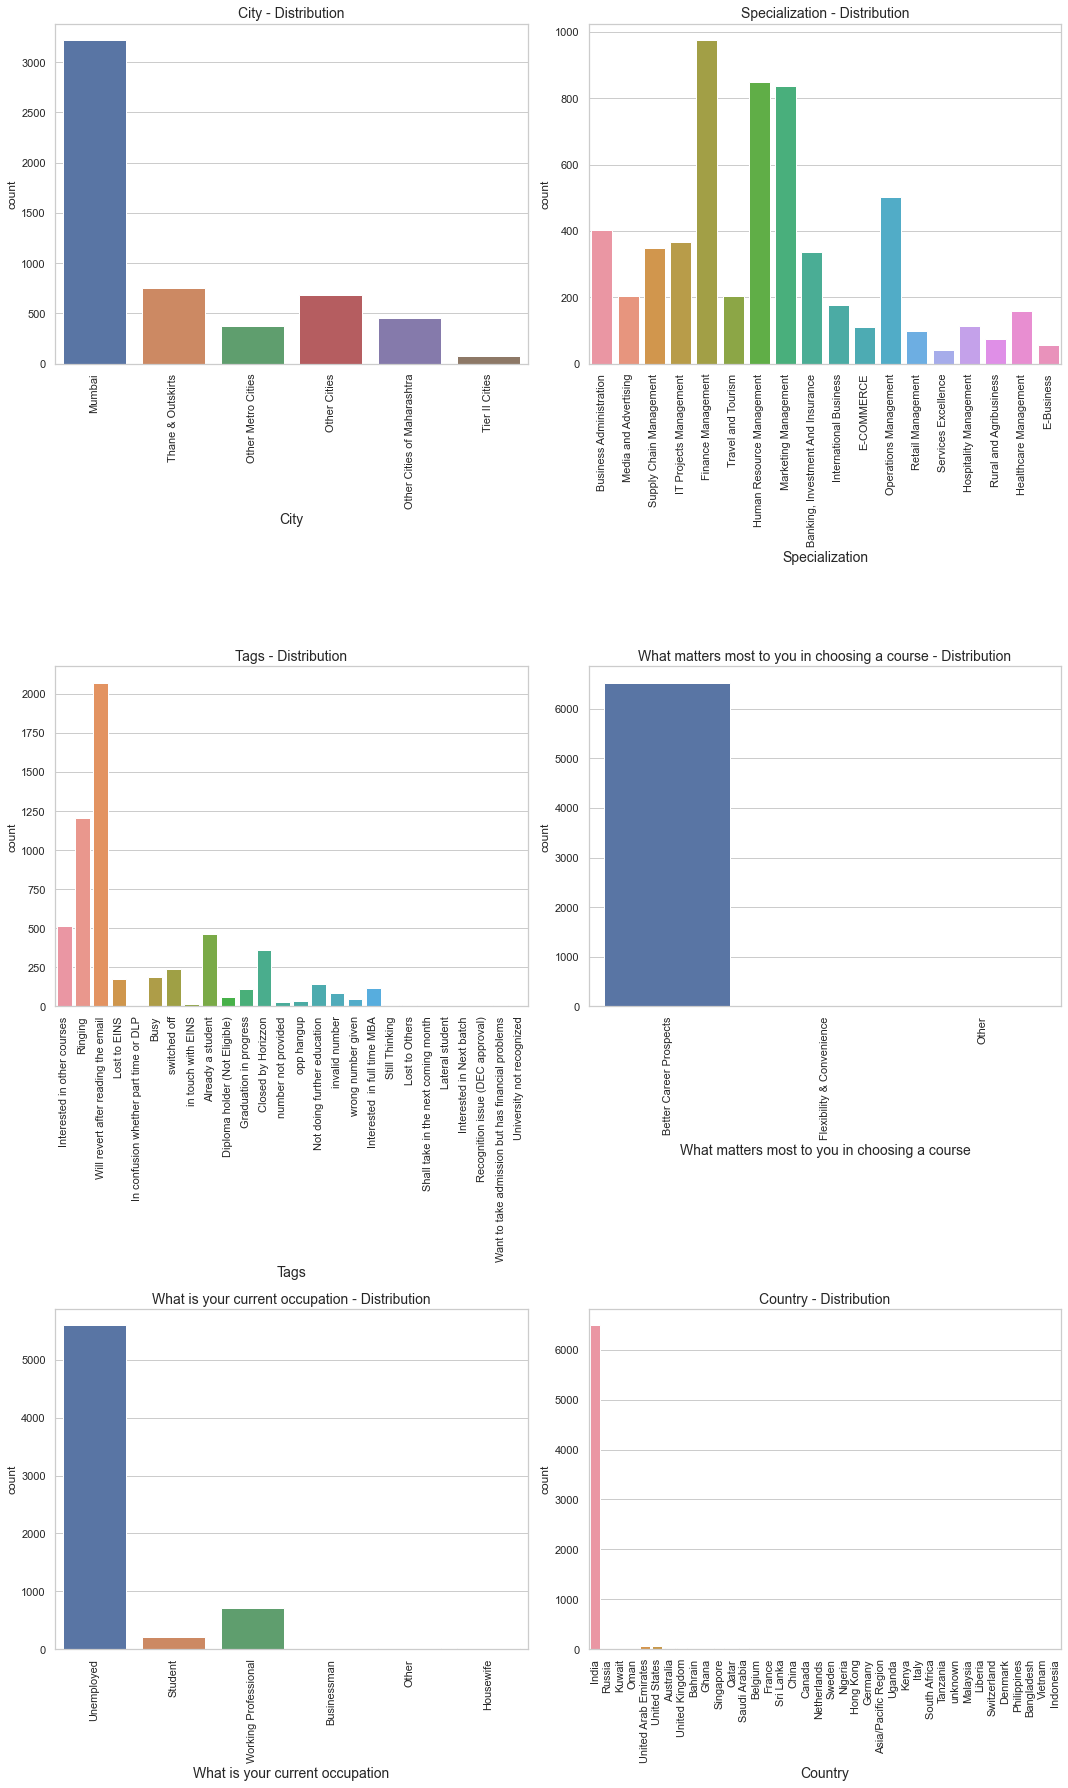

In [33]:
def countplot(x, fig):
    plt.subplot(3,2, fig)
    sns.countplot(df[x])
    plt.title(x+' - Distribution', size = 14)
    plt.xlabel(x,size = 14)
    plt.xticks(rotation = 90)

plt.figure(figsize=(15,25))

countplot('City',1)
countplot('Specialization',2)
countplot('Tags',3)
countplot('What matters most to you in choosing a course',4)
countplot('What is your current occupation',5)
countplot('Country',6)

plt.tight_layout()

__Inferences:__
- The majority of leads come from Mumbai, according to the city's count plot.
- The main factor influencing most people when choosing a field of study is having greater career prospects.
- The current profession with the most leads is unemployed.
- The majority of leads are focused on finance management, which is followed by human resource and manufacturing management.
- India accounts for the majority of the leads.
- The majority of leads came from consumers who had been marked as "would revert after reading the email."

In [34]:
#checking value counts of City column

df['City'].value_counts(dropna=False)

NaN                            3669
Mumbai                         3222
Thane & Outskirts               752
Other Cities                    686
Other Cities of Maharashtra     457
Other Metro Cities              380
Tier II Cities                   74
Name: City, dtype: int64

In [35]:
print("Before Imputing City Column, No. of Missing values is :",df['City'].isnull().sum())
df['City'].fillna(df.City.mode()[0],inplace = True)
print("After Imputing City Column, No. of Missing values is :",df['City'].isnull().sum())

Before Imputing City Column, No. of Missing values is : 3669
After Imputing City Column, No. of Missing values is : 0


In [36]:
#checking value counts of Specialization column

df['Specialization'].value_counts()

Finance Management                   976
Human Resource Management            848
Marketing Management                 838
Operations Management                503
Business Administration              403
IT Projects Management               366
Supply Chain Management              349
Banking, Investment And Insurance    338
Travel and Tourism                   203
Media and Advertising                203
International Business               178
Healthcare Management                159
Hospitality Management               114
E-COMMERCE                           112
Retail Management                    100
Rural and Agribusiness                73
E-Business                            57
Services Excellence                   40
Name: Specialization, dtype: int64

__Let's group related specializations into one area to get more insightful information.__

In [37]:
# Let us club all the management specialisations in one category called 'Management'

management = ['Finance Management','Human Resource Management','Marketing Management','Operations Management','IT Projects Management','Supply Chain Management','Healthcare Management','Hospitality Management','Retail Management']
df['Specialization'] = df['Specialization'].replace(management,'Management')

# Let us replace E-Commerce specialisations by'E-Business' as E-Commerce is a subset of E-business.

df['Specialization'] = df['Specialization'].replace('E-COMMERCE','E-Business')

In [38]:
df['Specialization'].value_counts(dropna=False)

Management                           4253
NaN                                  3380
Business Administration               403
Banking, Investment And Insurance     338
Media and Advertising                 203
Travel and Tourism                    203
International Business                178
E-Business                            169
Rural and Agribusiness                 73
Services Excellence                    40
Name: Specialization, dtype: int64

In [39]:
#Since specialization is something that, at the time the data were collected, was not available as an option, we cannot blindly impute it with mode. Therefore, based on our subjective experience, we decide to create a new category.

print("Before Imputing Specialization Column, No. of Missing values is :",df['Specialization'].isnull().sum())
df['Specialization'] = df['Specialization'].replace(np.nan,'Others')
print("After Imputing Specialization Column, No. of Missing values is :",df['Specialization'].isnull().sum())

Before Imputing Specialization Column, No. of Missing values is : 3380
After Imputing Specialization Column, No. of Missing values is : 0


In [40]:
df['Tags'].value_counts(dropna = False)

NaN                                                  3353
Will revert after reading the email                  2072
Ringing                                              1203
Interested in other courses                           513
Already a student                                     465
Closed by Horizzon                                    358
switched off                                          240
Busy                                                  186
Lost to EINS                                          175
Not doing further education                           145
Interested  in full time MBA                          117
Graduation in progress                                111
invalid number                                         83
Diploma holder (Not Eligible)                          63
wrong number given                                     47
opp hangup                                             33
number not provided                                    27
in touch with 

In [41]:
#The lead's current state is indicated through tags given to customers.
#Let's group all the similar tags into a single category.

df['Tags'] = df['Tags'].replace(['Ringing','switched off','Busy','opp hangup'],'Try Calling again')
df['Tags'] = df['Tags'].replace(['Lost to EINS','Lost to Others'],'Lost')
df['Tags'] = df['Tags'].replace(['invalid number','wrong number given','number not provided'],'No phone number')
df['Tags'] = df['Tags'].replace(['Not doing further education','Diploma holder (Not Eligible)'],'Not Interested/Not Eligible')

In [42]:
# Let us observe the the value counts again
df['Tags'].value_counts(dropna = False)

NaN                                                  3353
Will revert after reading the email                  2072
Try Calling again                                    1662
Interested in other courses                           513
Already a student                                     465
Closed by Horizzon                                    358
Not Interested/Not Eligible                           208
Lost                                                  182
No phone number                                       157
Interested  in full time MBA                          117
Graduation in progress                                111
in touch with EINS                                     12
Still Thinking                                          6
Want to take admission but has financial problems       6
In confusion whether part time or DLP                   5
Interested in Next batch                                5
Lateral student                                         3
Shall take in 

In [43]:
#Tags assigned to customers that indicate the lead's current status.
#We can presume that the customer may not be interested and that he will follow up later, so we can just impute this field by mode.

print("Before Imputing Tags Column, No. of Missing values is :",df['Tags'].isnull().sum())
df['Tags'] = df['Tags'].replace(np.nan,'Others')
print("After Imputing Tags Column, No. of Missing values is :",df['Tags'].isnull().sum())

Before Imputing Tags Column, No. of Missing values is : 3353
After Imputing Tags Column, No. of Missing values is : 0


In [44]:
#checking value counts of "What matters most to you in choosing a course" column

df['What matters most to you in choosing a course'].value_counts(dropna=False)

Better Career Prospects      6528
NaN                          2709
Flexibility & Convenience       2
Other                           1
Name: What matters most to you in choosing a course, dtype: int64

In [45]:
#Since the majority of customers choose Better Career Prospects with the assumption that all NaN's are same, mode imputation is used.

print("Before Imputing 'What matters most to you in choosing a course' Column, No. of Missing values is :",df['What matters most to you in choosing a course'].isnull().sum())
df['What matters most to you in choosing a course'].fillna(df['What matters most to you in choosing a course'].mode()[0],inplace = True)
print("After Imputing 'What matters most to you in choosing a course' Column, No. of Missing values is :",df['What matters most to you in choosing a course'].isnull().sum())

Before Imputing 'What matters most to you in choosing a course' Column, No. of Missing values is : 2709
After Imputing 'What matters most to you in choosing a course' Column, No. of Missing values is : 0


In [46]:
#checking value counts of "What is your current occupation" column

df['What is your current occupation'].value_counts(dropna=False)

Unemployed              5600
NaN                     2690
Working Professional     706
Student                  210
Other                     16
Housewife                 10
Businessman                8
Name: What is your current occupation, dtype: int64

In [47]:
#Given that the occupation is unknown and the information relates to a particular educational course,
#Therefore, it is safe to presume that the majority of them are unemployed. Mode imputation is being used for this.

print("Before Imputing 'What is your current occupation' Column, No. of Missing values is :",df['What is your current occupation'].isnull().sum())
df['What is your current occupation'].fillna(df['What is your current occupation'].mode()[0],inplace = True)
print("After Imputing 'What is your current occupation' Column, No. of Missing values is :",df['What is your current occupation'].isnull().sum())

Before Imputing 'What is your current occupation' Column, No. of Missing values is : 2690
After Imputing 'What is your current occupation' Column, No. of Missing values is : 0


In [48]:
# Let us now treat the country column

df['Country'].value_counts(dropna = False)

India                   6492
NaN                     2461
United States             69
United Arab Emirates      53
Singapore                 24
Saudi Arabia              21
United Kingdom            15
Australia                 13
Qatar                     10
Bahrain                    7
Hong Kong                  7
Oman                       6
France                     6
unknown                    5
Kuwait                     4
South Africa               4
Canada                     4
Nigeria                    4
Germany                    4
Sweden                     3
Philippines                2
Uganda                     2
Italy                      2
Bangladesh                 2
Netherlands                2
Asia/Pacific Region        2
China                      2
Belgium                    2
Ghana                      2
Kenya                      1
Sri Lanka                  1
Tanzania                   1
Malaysia                   1
Liberia                    1
Switzerland   

In [49]:
# Choosing mode imputation for country

print("Before Imputing Country Column, No. of Missing values is :",df['Country'].isnull().sum())
df['Country'].fillna(df.Country.mode()[0],inplace = True)
print("After Imputing Country Column, No. of Missing values is :",df['Country'].isnull().sum())

Before Imputing Country Column, No. of Missing values is : 2461
After Imputing Country Column, No. of Missing values is : 0


In [50]:
#Lets us now again check the null percentage
round((df.isnull().sum()/len(df.index) *100),2).sort_values(ascending = False).head()

TotalVisits             1.48
Page Views Per Visit    1.48
Last Activity           1.11
Lead Source             0.39
Lead Number             0.00
dtype: float64

In [51]:
df['Last Activity'].value_counts(dropna = False)

Email Opened                    3437
SMS Sent                        2745
Olark Chat Conversation          973
Page Visited on Website          640
Converted to Lead                428
Email Bounced                    326
Email Link Clicked               267
Form Submitted on Website        116
NaN                              103
Unreachable                       93
Unsubscribed                      61
Had a Phone Conversation          30
Approached upfront                 9
View in browser link Clicked       6
Email Received                     2
Email Marked Spam                  2
Visited Booth in Tradeshow         1
Resubscribed to emails             1
Name: Last Activity, dtype: int64

In [52]:
# Let's categorize all recent activities with very few counts into the category "Others."
# Grouping them under a single category would be more useful for analysis because of their extremely low number.

Others_combine =['Unreachable','Unsubscribed','Had a Phone Conversation','Approached upfront','View in browser link Clicked','Email Received','Email Marked Spam','Visited Booth in Tradeshow','Resubscribed to emails']
df['Last Activity'] = df['Last Activity'].replace(Others_combine,'Others')

In [53]:
df['Last Activity'].value_counts(dropna = False)

Email Opened                 3437
SMS Sent                     2745
Olark Chat Conversation       973
Page Visited on Website       640
Converted to Lead             428
Email Bounced                 326
Email Link Clicked            267
Others                        205
Form Submitted on Website     116
NaN                           103
Name: Last Activity, dtype: int64

In [54]:
# imputation for 'Last Activity' column

print("Before Imputing Last ACtivity Column, No. of Missing values is :",df['Last Activity'].isnull().sum())
df['Last Activity'] = df['Last Activity'].replace(np.nan,'Others')
print("After Imputing Last Activity Column, No. of Missing values is :",df['Last Activity'].isnull().sum())

Before Imputing Last ACtivity Column, No. of Missing values is : 103
After Imputing Last Activity Column, No. of Missing values is : 0


In [55]:
#Lets us now again check the null percentage
round((df.isnull().sum()/len(df.index) *100),2).sort_values(ascending = False).head()

TotalVisits             1.48
Page Views Per Visit    1.48
Lead Source             0.39
Lead Number             0.00
Search                  0.00
dtype: float64

In [56]:
# Let us check the column Lead Source

df['Lead Source'].value_counts(dropna = False)

Google               2868
Direct Traffic       2543
Olark Chat           1755
Organic Search       1154
Reference             534
Welingak Website      142
Referral Sites        125
Facebook               55
NaN                    36
bing                    6
google                  5
Click2call              4
Press_Release           2
Social Media            2
Live Chat               2
youtubechannel          1
testone                 1
Pay per Click Ads       1
welearnblog_Home        1
WeLearn                 1
blog                    1
NC_EDM                  1
Name: Lead Source, dtype: int64

In [57]:
# let us Combine similar categories to avoid confusion

df['Lead Source'] = df['Lead Source'].replace('google','Google')
df['Lead Source'] = df['Lead Source'].replace('Facebook','Social Media')

# Let us Combine Sources that have less value counts to simplify our analysis.

less_count = ['bing','Click2call','Live Chat','Press_Release','welearnblog_Home','blog','testone','NC_EDM','youtubechannel','Pay per Click Ads','WeLearn']
df['Lead Source'] = df['Lead Source'].replace(less_count,'Others')

In [58]:
# imputation for 'Lead source' column
print("Before Imputing Lead Source Column, No. of Missing values is :",df['Lead Source'].isnull().sum())
df['Lead Source'] = df['Lead Source'].replace(np.nan,'Others')
print("After Imputing Lead Source Column, No. of Missing values is :",df['Lead Source'].isnull().sum())

Before Imputing Lead Source Column, No. of Missing values is : 36
After Imputing Lead Source Column, No. of Missing values is : 0


In [59]:
#Lets us now again check the null percentage
round((df.isnull().sum()/len(df.index) *100),2).sort_values(ascending = False).head()

TotalVisits                                      1.48
Page Views Per Visit                             1.48
Lead Number                                      0.00
What matters most to you in choosing a course    0.00
A free copy of Mastering The Interview           0.00
dtype: float64

In [60]:
#We choose to drop these rows as they are very less nearly 2%
print("Shape of Data Before Dropping rows ",df.shape)

a = df.shape[0]
df.dropna(inplace = True)
print("shape of Data After Dropping rows ",df.shape)

print("Percentage of Information Loss", round(100*((a-df.shape[0])/a),2))

Shape of Data Before Dropping rows  (9240, 24)
shape of Data After Dropping rows  (9103, 24)
Percentage of Information Loss 1.48


In [61]:
#checking missing values in leftover columns

round(100*(df.isnull().sum()/len(df.index)),2)

Lead Number                                      0.0
Lead Origin                                      0.0
Lead Source                                      0.0
Do Not Email                                     0.0
Do Not Call                                      0.0
Converted                                        0.0
TotalVisits                                      0.0
Total Time Spent on Website                      0.0
Page Views Per Visit                             0.0
Last Activity                                    0.0
Country                                          0.0
Specialization                                   0.0
What is your current occupation                  0.0
What matters most to you in choosing a course    0.0
Search                                           0.0
Newspaper Article                                0.0
X Education Forums                               0.0
Newspaper                                        0.0
Digital Advertisement                         

__There are no missing values in our dataframe.__

### 2.6 Additional Analysis Simplification

In [62]:
#checking value counts of last Notable Activity

df['Last Notable Activity'].value_counts()

Modified                        3270
Email Opened                    2827
SMS Sent                        2172
Page Visited on Website          318
Olark Chat Conversation          183
Email Link Clicked               173
Email Bounced                     60
Unsubscribed                      47
Unreachable                       32
Had a Phone Conversation          14
Email Marked Spam                  2
Approached upfront                 1
Resubscribed to emails             1
View in browser link Clicked       1
Form Submitted on Website          1
Email Received                     1
Name: Last Notable Activity, dtype: int64

In [63]:
# Let us combine together all those categories whose have very few last notable ativity count

low_count = ['Email Bounced','Unsubscribed','Unreachable','Had a Phone Conversation','Email Marked Spam','Form Submitted on Website',
'Resubscribed to emails','Approached upfront','Email Received','View in browser link Clicked']
df['Last Notable Activity'] = df['Last Notable Activity'].replace(low_count,'Other')


In [64]:
#checking value counts of last Notable Activity
df['Last Notable Activity'].value_counts()

Modified                   3270
Email Opened               2827
SMS Sent                   2172
Page Visited on Website     318
Olark Chat Conversation     183
Email Link Clicked          173
Other                       160
Name: Last Notable Activity, dtype: int64

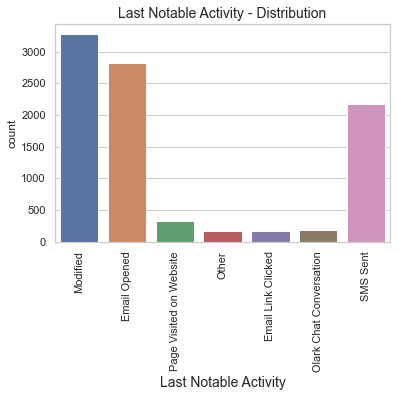

In [65]:
# Let us visualize this column
sns.countplot(df['Last Notable Activity'])
plt.title('Last Notable Activity - Distribution', size = 14)
plt.xlabel('Last Notable Activity',size = 14)
plt.xticks(rotation = 90)
plt.show()

### 2.7 Data type correction

In [66]:
# We observe that the data type for TotalVisits is incorrect.

df['TotalVisits'] = df['TotalVisits'].astype('int64')

## 3. Data Visualization and Outlier Treatment

### 3.1 Numerical columns

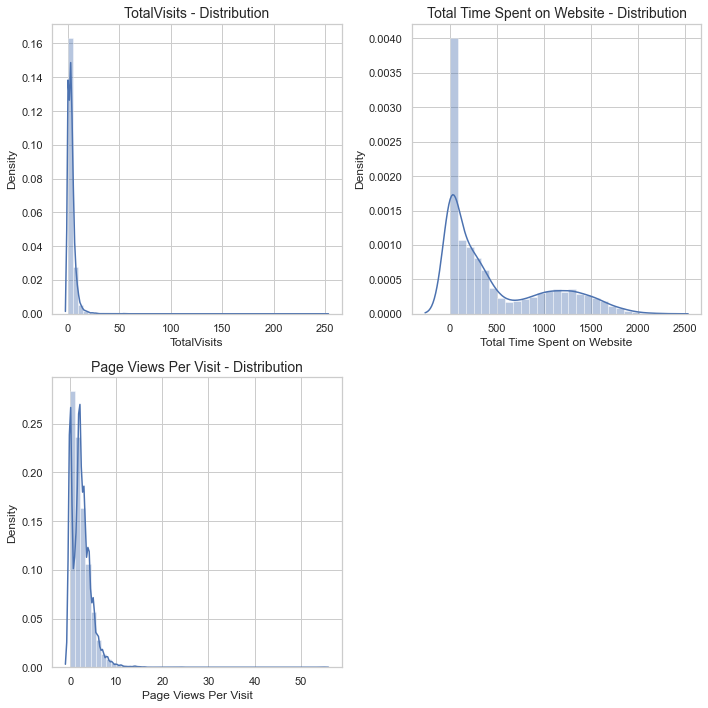

In [67]:

def spread(x, fig):
    plt.subplot(2,2,fig) 
    sns.distplot(df[x])
    plt.title(x+' - Distribution', size = 14)
    plt.xlabel(x)

    
plt.figure(figsize=(10,10))

spread('TotalVisits',1)
spread('Total Time Spent on Website',2)
spread('Page Views Per Visit',3)

plt.tight_layout()

__We observe that our data is skewed.__

In [68]:
#Checking Data imbalance exists or not

round(((sum(df['Converted'])/len(df.index))*100),2)

38.02

__Only 38% of the leads are converted, while 62% are not, according to our observations. The dataset has a data imbalance. The data is skewed in favour of unconverted leads.__

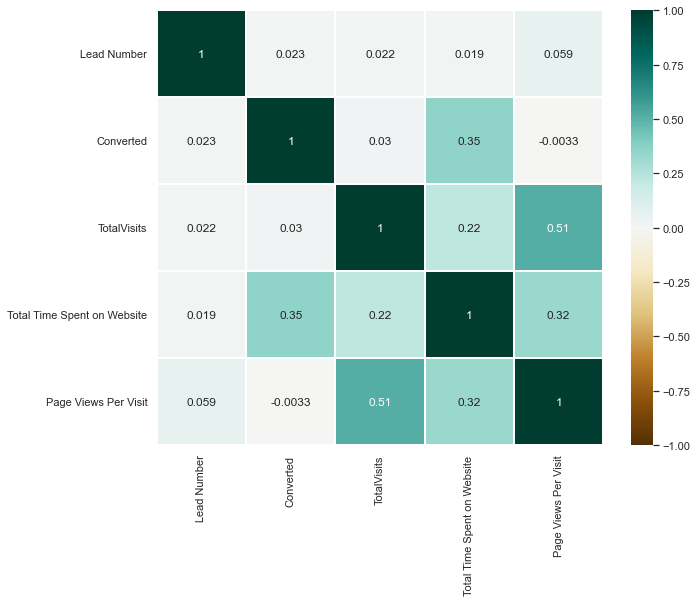

In [69]:
# Correlation

plt.figure(figsize=(10,8))

# heatmap
sns.heatmap(df.corr(), annot=True,cmap="BrBG", robust=True,linewidth=0.1, vmin=-1 )
plt.show()

__We can see that there is not much of a correlation between the variables.__

### 3.2 Visualizing Categorical Columns

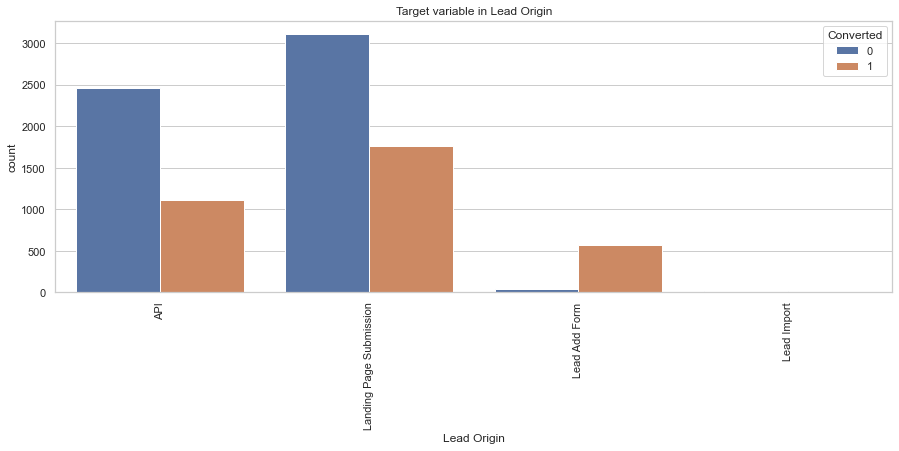

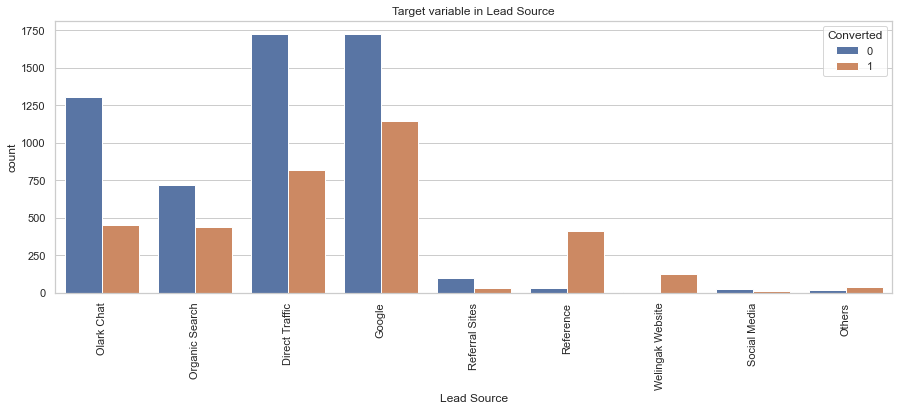

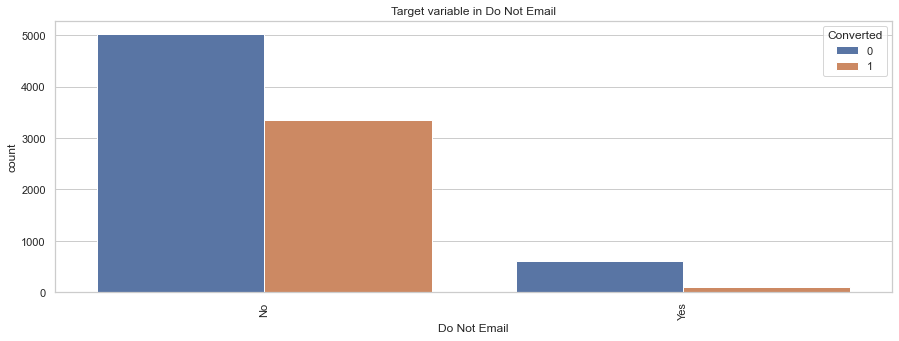

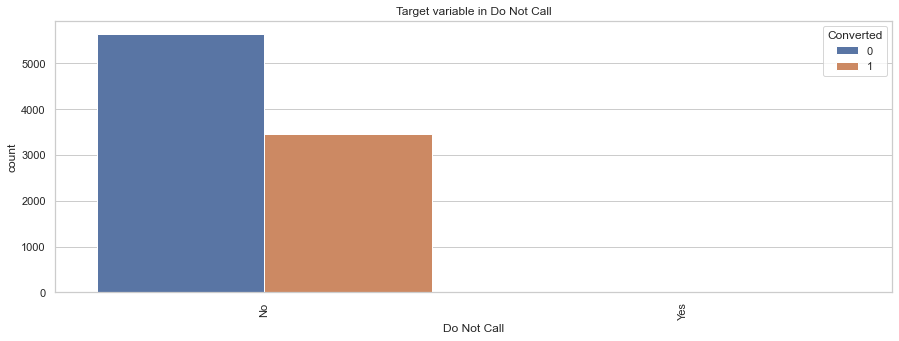

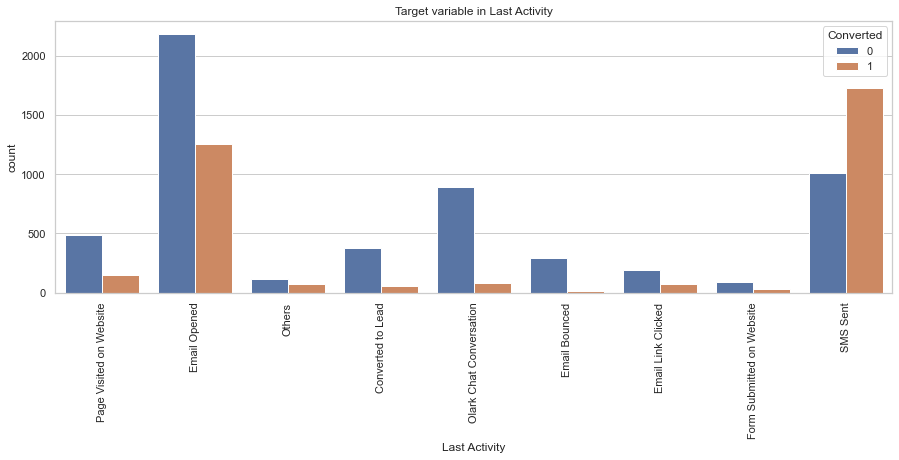

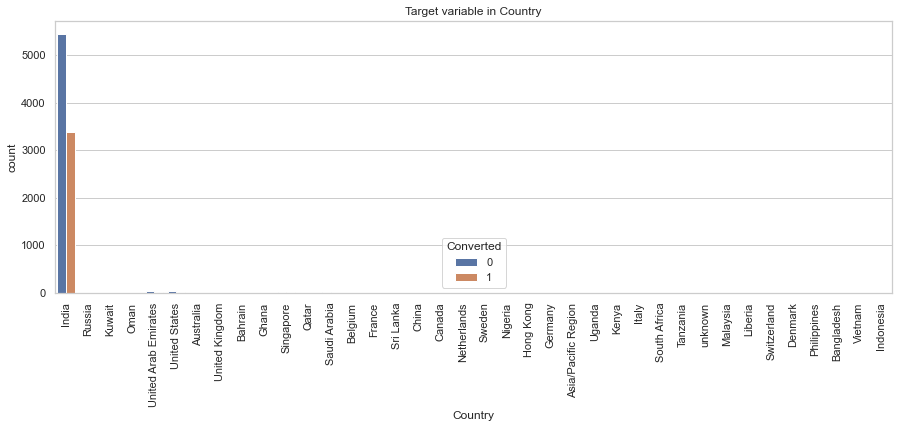

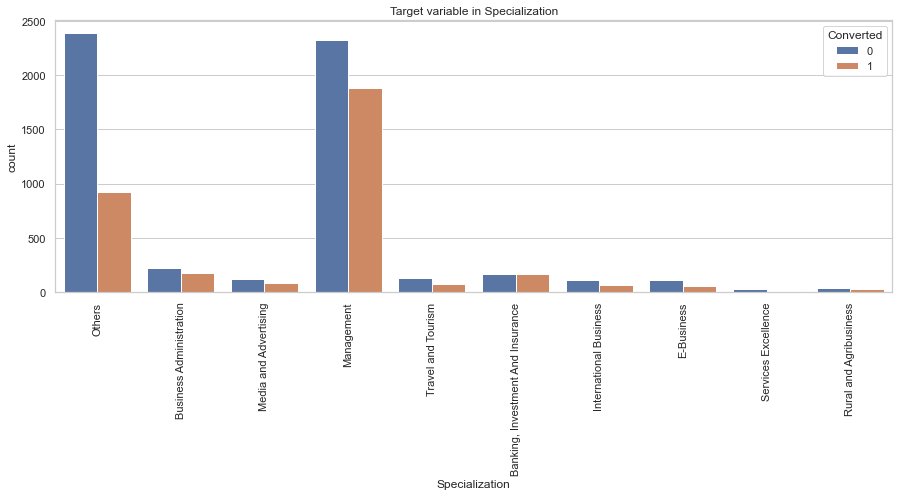

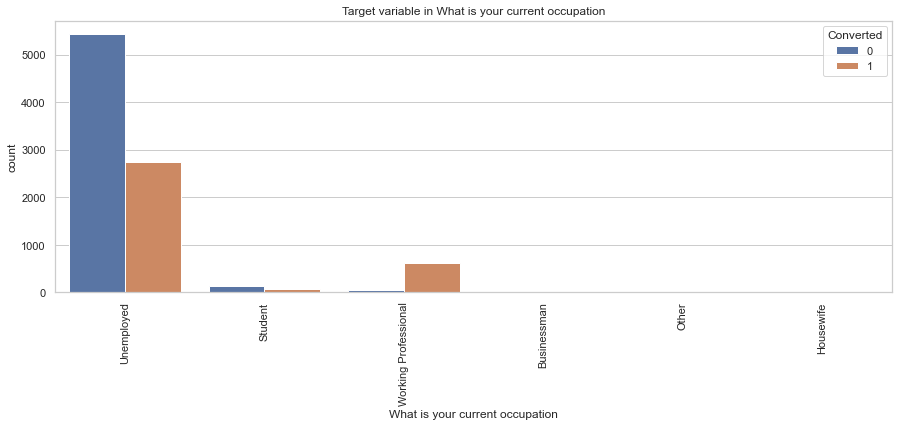

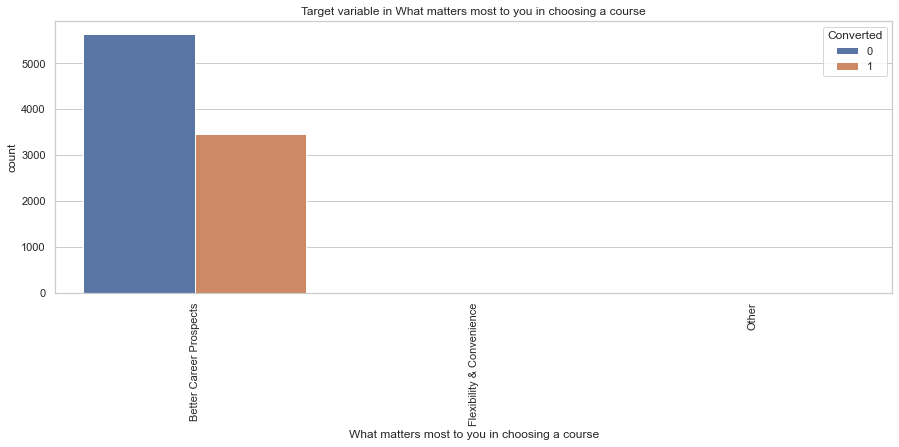

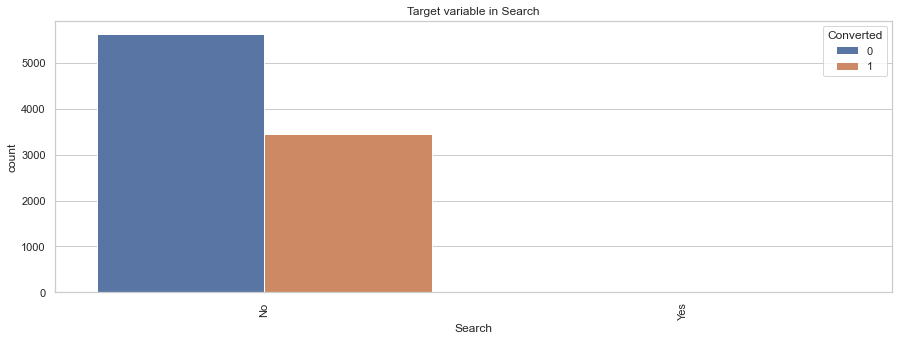

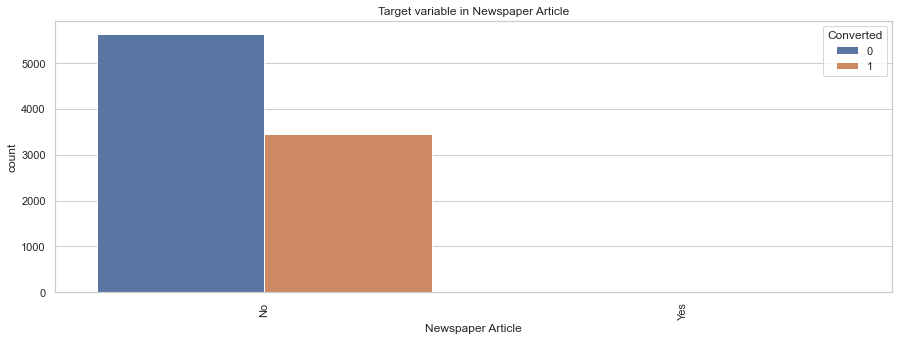

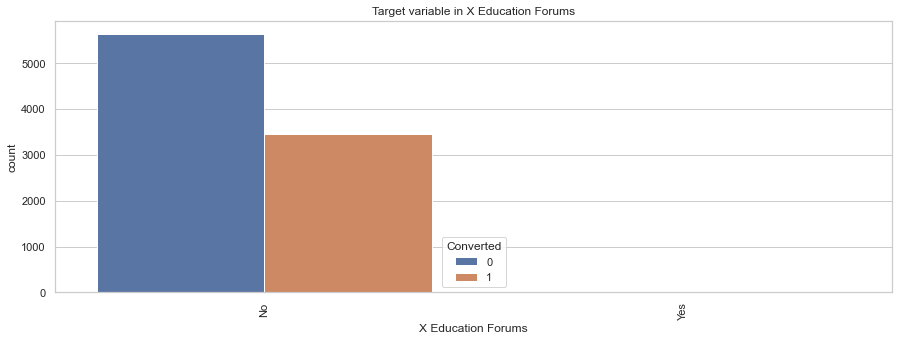

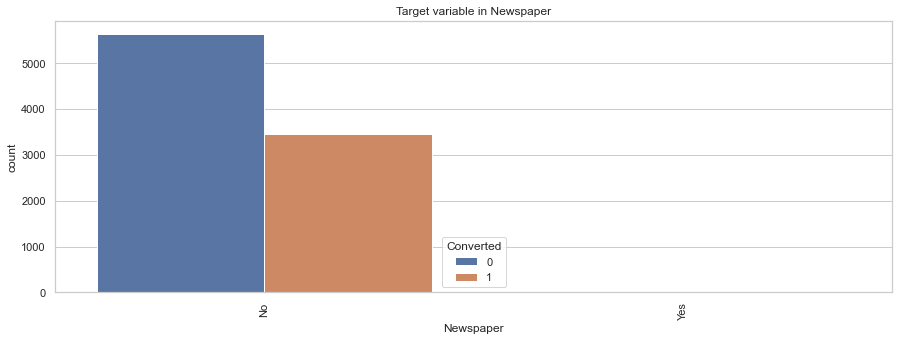

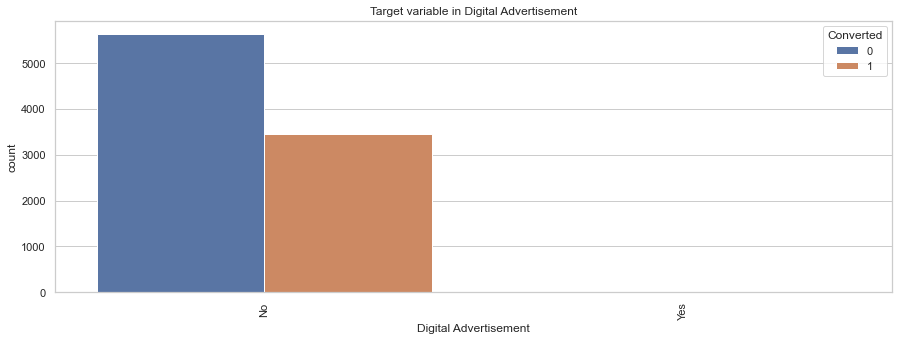

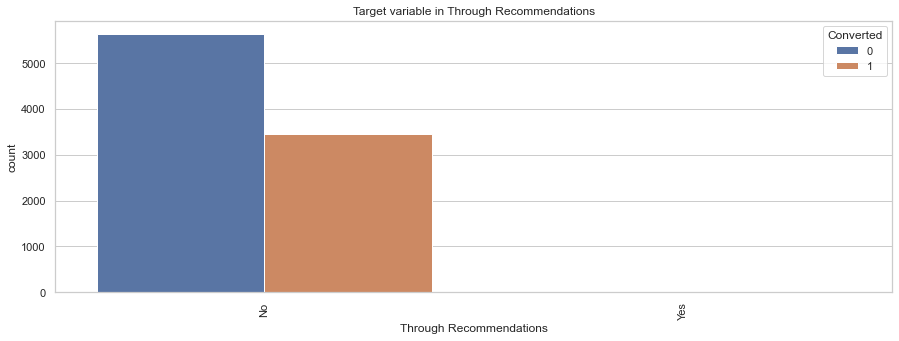

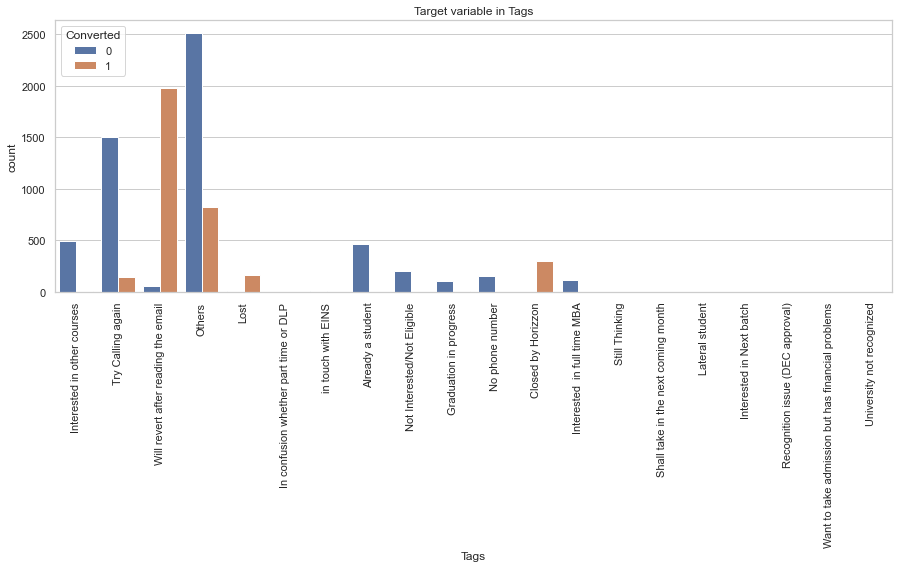

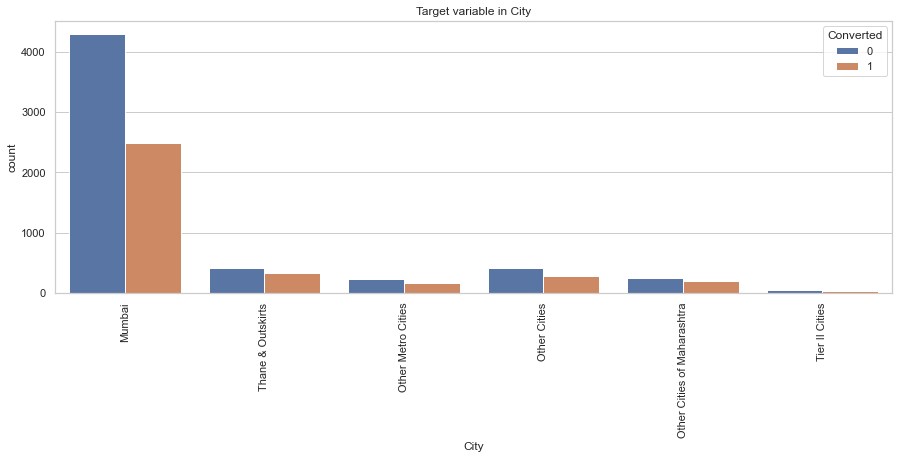

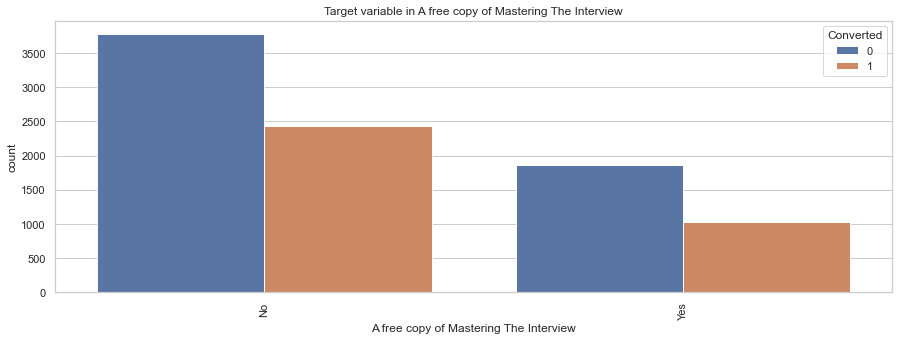

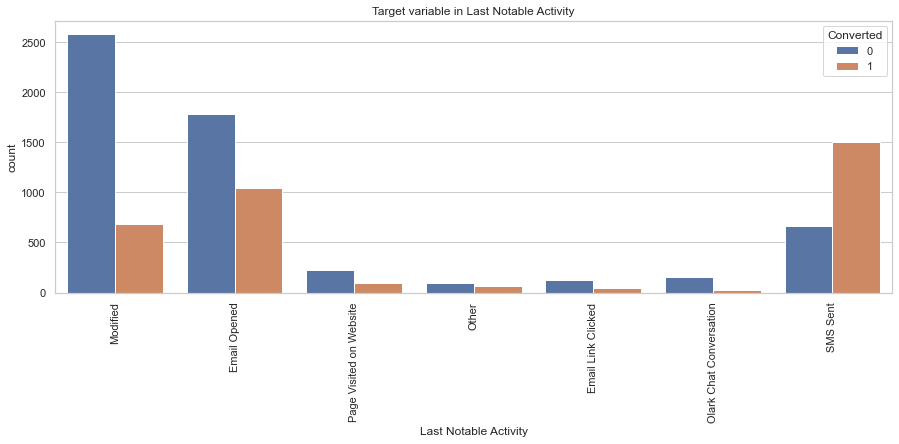

In [70]:
converted = df.select_dtypes(include ="object").columns
for i in converted:
    
    plt.figure(figsize =(15,5))
    sns.countplot(df[i], hue=df.Converted)
    plt.xticks(rotation = 90)
    plt.title('Target variable in'+' '+ i)
    plt.xlabel(i)
    plt.show()


__Inferences__<br>
- __Lead Origin__<br>
1) The majority of the leads come from customers who were classified as leads after submitting their information on a landing page.<br>
2) Lead Add Form customers have a high likelihood of converting. These clients are few in number.<br>
3) Lead import and lead origin-API have the lowest conversion rates. There aren't many people who use Lead Import.<br><br>
In order to increase overall lead conversion rate, we must pay more attention to increasing lead conversion rate of Customers coming through API and Landing Page Submission and increasing lead generation from Lead Add Form.<br><br>
- __Lead Source__<br>
1) Google and direct traffic are the main sources of the leads.<br>
2) Lead sources from "Google" have the highest conversion probabilities.<br>
3) Leads with source "Reference" have the highest probability of converting.<br><br>
- __Do Not Email__<br>
1) Customers that select "Do Not Mail" have lower conversion rates.<br>
2) The conversion rate is higher, at about 40%, for customers who do not select the "Do Not Mail" option. The great majority of the leads come from this.<br><br>
- __Do Not Call__<br>
The majority of leads come from customers who do not select the "Do Not Call" option. These customers have a higher conversion rate of about 38%.<br><br>
- __Last Activity__<br>
1) The conversion rate for customers whose most recent activity was SMS Sent is greater, at about 63%.<br>
2) The majority of clients had an email opened as their most recent activity. They have a conversion rate of about 36%.<br><br>
In order to increase total lead conversion rates, we must concentrate more on increasing lead conversion rates for customers whose most recent action was Email Opened and increase the number of leads from customers whose most recent activity was SMS Sent.<br><br>
- __Specialisation__<br>
1) Management and Others as specialisations make up the majority of leads.<br>
2) The least likely leads to convert are those with a rural and agricultural business focus.<br><br>
- __What is your current occupation__<br>
1) The majority of leads occupation as unemployed.<br>
2) Very few leads are Housewives<br><br>
- __What matters most to you in choosing a career__<br>
There are more leads with greater conversion rates that value better career options most when choosing a career.<br><br>
- __Search, Newspaper Article,X Education Forums, Newspaper & Digital Advertisement__<br>
There are extremely few customers who have viewed the education company's advertisement in any way. Nothing of significance that will increase the lead conversion rate overall can be inferred from the plot.<br><br>
- __Tags__<br>
The leads who reply after reading the email and others should receive more attention because they are potential prospects and have a higher conversion rate.<br><br>
- __City__<br>
Mumbai is where the majority of the leads come from. Mumbai city residents should be targeted more since they are potential leads.<br><br>
- __A Free Copy Of Mastering the Interview__<br>
Customers who want a free copy of Mastering the Interview are fewer in number, but both types of customers have a similar probability of conversion.<br><br>
- __Last Notable Activity__<br>
1) There are more customers whose last notable activity was Modified.<br>
2) The probability of conversion is higher for customers whose most last notable activity was SMS Sent.<br>


####  Handling of high data imbalance

We can see from the above plots that some columns have an uneven distribution of data. They will produce skewed results. Thus, it is better to drop them.<br>

 - Do Not Call
 - Country
 - Search
 - Newspaper Article
 - X Education Forums
 - Newspaper
 - Digital Advertisement
 - Through Recommendations
 - What matters most to you in choosing a course

In [71]:
# Dropping the high data imbalance columns

imbalance_data = ['Do Not Call','Country','Search','Newspaper Article','X Education Forums','Newspaper',
                  'Digital Advertisement', 'Through Recommendations','What matters most to you in choosing a course']
df = df.drop(imbalance_data,axis =1)

In [72]:
df.shape

(9103, 15)

### 3.3 Visualizing Numerical variables

#### 3.3.1  Outlier Analysis 

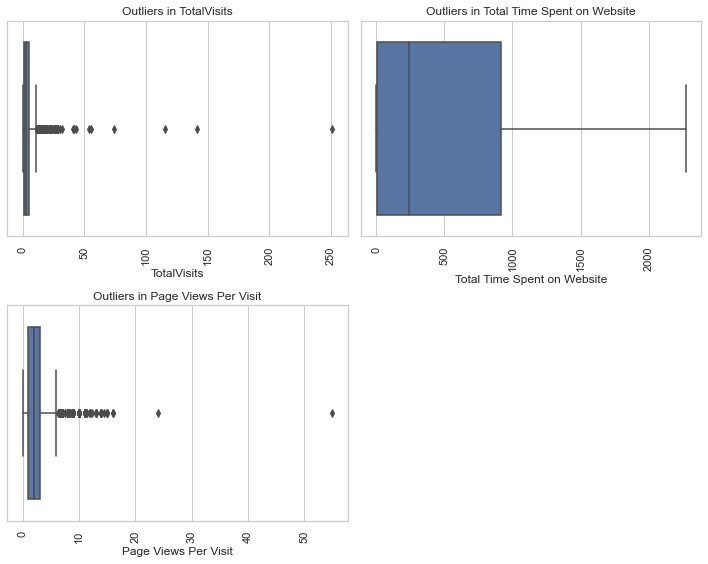

In [73]:
def boxplot(x,fig,):
    plt.subplot(2,2,fig)
    sns.boxplot(x = x, data = df)
    plt.title('Outliers in'+' '+ x)
    plt.xlabel(x)
    plt.xticks(rotation = 90)

                         
plt.figure(figsize =(10,8))
                         
boxplot('TotalVisits',1)
boxplot('Total Time Spent on Website',2)
boxplot('Page Views Per Visit',3)

plt.tight_layout()

We observe some extreme numbers for visits overall and page views per visit. Let's check outliers using statistical methods.

In [74]:
# Checking percentile values 

df[['Total Time Spent on Website','TotalVisits','Page Views Per Visit']].describe(percentiles=[0.01,0.05,.25, .5, .75, .90, .95, .99])

,Total Time Spent on Website,TotalVisits,Page Views Per Visit
count,9103.000000,9103.000000,9103.000000
mean,481.350104,3.445238,2.362820
std,545.066142,4.854853,2.161418
min,0.000000,0.000000,0.000000
1%,0.000000,0.000000,0.000000
5%,0.000000,0.000000,0.000000
25%,9.000000,1.000000,1.000000
50%,244.000000,3.000000,2.000000
75%,919.500000,5.000000,3.000000
90%,1372.000000,7.000000,5.000000


In [75]:
# removing outliers using the IQR
Q1 = df['TotalVisits'].quantile(0.01)
Q3 = df['TotalVisits'].quantile(0.99)
df = df.loc[(df['TotalVisits'] >= Q1) & (df['TotalVisits'] <= Q3)]

Q1 = df['Page Views Per Visit'].quantile(0.01)
Q3 = df['Page Views Per Visit'].quantile(0.99)
df=df.loc[(df['Page Views Per Visit'] >= Q1) & (df['Page Views Per Visit'] <= Q3)]

Q1 = df['Total Time Spent on Website'].quantile(0.01)
Q3 = df['Total Time Spent on Website'].quantile(0.99)
df=df.loc[(df['Total Time Spent on Website'] >= Q1) & (df['Total Time Spent on Website'] <= Q3)]

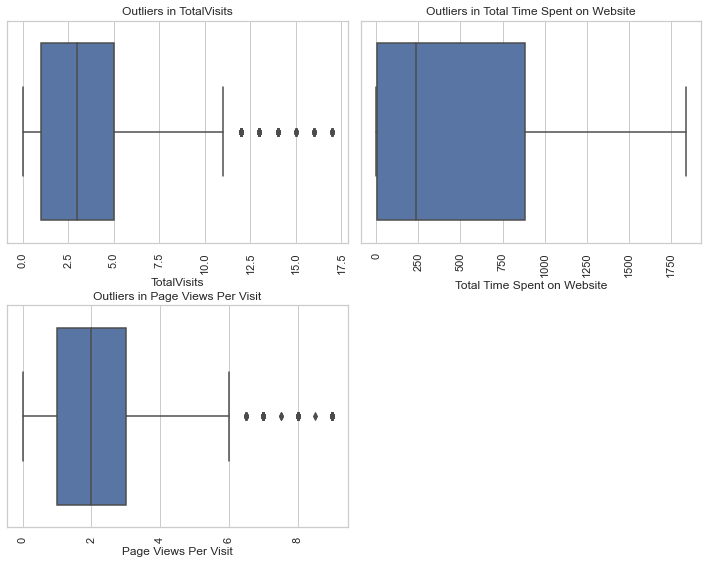

In [76]:
# Treatment of outliers
plt.figure(figsize =(10,8))
                         
boxplot('TotalVisits',1)
boxplot('Total Time Spent on Website',2)
boxplot('Page Views Per Visit',3)

plt.tight_layout()

In [77]:
df.shape

(8863, 15)

#### 3.3.2 Bivariate Analysis - Visualizing Numerical Columns with Target Column

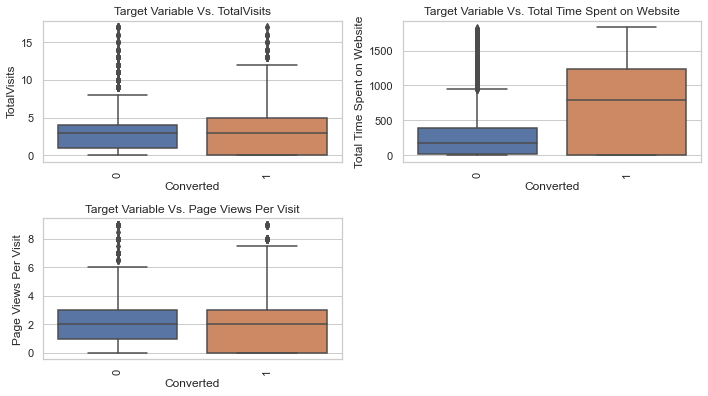

In [78]:
def boxplot(y,fig):
    plt.subplot(3,2,fig)
    sns.boxplot(x = 'Converted', y = y, data = df)
    plt.title('Target Variable Vs.'+' '+ y)
    plt.xlabel('Converted')
    plt.ylabel(y)
    plt.xticks(rotation = 90)

                         
plt.figure(figsize =(10,8))
                         

boxplot('TotalVisits',1)
boxplot('Total Time Spent on Website',2)
boxplot('Page Views Per Visit',3)

plt.tight_layout()

__Inferences__<br>
- __Total Visits & Page Views Per Visit__<br>
  The median for both converted and unconverted leads is similar.<br>
  From them, nothing can be inferred.<br><br>
- __Total Time Spent on website__<br>
  Leads have a greater probability of converting if they spend more time on the X education website.<br>


## 4. Data Preparation

### 4.1. Creating Dummy

In [79]:
# Let us copy our dataset before proceeding with dummy creations

df_new = df.copy()

#Converting Binary variables yes/No to 0 or 1

def binary_map(x):
    return x.map({'Yes':1,'No':0})

In [80]:
cols = ['Do Not Email','A free copy of Mastering The Interview']
df_new[cols] = df_new[cols].apply(binary_map)

In [81]:
df_new.head()

,Lead Number,Lead Origin,Lead Source,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,What is your current occupation,Tags,City,A free copy of Mastering The Interview,Last Notable Activity
0,660737,API,Olark Chat,0,0,0,0,0.0,Page Visited on Website,Others,Unemployed,Interested in other courses,Mumbai,0,Modified
1,660728,API,Organic Search,0,0,5,674,2.5,Email Opened,Others,Unemployed,Try Calling again,Mumbai,0,Email Opened
2,660727,Landing Page Submission,Direct Traffic,0,1,2,1532,2.0,Email Opened,Business Administration,Student,Will revert after reading the email,Mumbai,1,Email Opened
3,660719,Landing Page Submission,Direct Traffic,0,0,1,305,1.0,Others,Media and Advertising,Unemployed,Try Calling again,Mumbai,0,Modified
4,660681,Landing Page Submission,Google,0,1,2,1428,1.0,Converted to Lead,Others,Unemployed,Will revert after reading the email,Mumbai,0,Modified


In [82]:
# Creating dummy variables for the categorical variables and droppong the first one

cols1 = [i for i in df_new.select_dtypes(include ='object').columns if len(df_new[i].value_counts()) >2 and i != 'Lead Number']

dummy1 = pd.get_dummies(df[cols1], drop_first= True)
df_new.head()

,Lead Number,Lead Origin,Lead Source,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,What is your current occupation,Tags,City,A free copy of Mastering The Interview,Last Notable Activity
0,660737,API,Olark Chat,0,0,0,0,0.0,Page Visited on Website,Others,Unemployed,Interested in other courses,Mumbai,0,Modified
1,660728,API,Organic Search,0,0,5,674,2.5,Email Opened,Others,Unemployed,Try Calling again,Mumbai,0,Email Opened
2,660727,Landing Page Submission,Direct Traffic,0,1,2,1532,2.0,Email Opened,Business Administration,Student,Will revert after reading the email,Mumbai,1,Email Opened
3,660719,Landing Page Submission,Direct Traffic,0,0,1,305,1.0,Others,Media and Advertising,Unemployed,Try Calling again,Mumbai,0,Modified
4,660681,Landing Page Submission,Google,0,1,2,1428,1.0,Converted to Lead,Others,Unemployed,Will revert after reading the email,Mumbai,0,Modified


In [83]:
# Concatenating the dummy variables with Original DataFrame

df_new = pd.concat([df_new,dummy1], axis =1)
df_new.shape

(8863, 78)

In [84]:
cols1 = [i for i in df_new.select_dtypes(include ='object').columns if len(df_new[i].value_counts()) >2 and i != 'Prospect ID']

#Dropping the variables which were converted into Dummies
df_new.drop(cols1, axis =1, inplace = True)
df_new.shape

(8863, 70)

In [85]:
#Seprarting Target Column from original Dataframe.

y = df_new['Converted']
X = df_new.drop(['Converted','Lead Number'],axis = 1)

In [86]:
X.head()

,Do Not Email,TotalVisits,Total Time Spent on Website,Page Views Per Visit,A free copy of Mastering The Interview,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Others,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Social Media,Lead Source_Welingak Website,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Opened,Last Activity_Form Submitted on Website,Last Activity_Olark Chat Conversation,Last Activity_Others,Last Activity_Page Visited on Website,Last Activity_SMS Sent,Specialization_Business Administration,Specialization_E-Business,Specialization_International Business,Specialization_Management,Specialization_Media and Advertising,Specialization_Others,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Travel and Tourism,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,Tags_Closed by Horizzon,Tags_Graduation in progress,Tags_In confusion whether part time or DLP,Tags_Interested in full time MBA,Tags_Interested in Next batch,Tags_Interested in other courses,Tags_Lateral student,Tags_Lost,Tags_No phone number,Tags_Not Interested/Not Eligible,Tags_Others,Tags_Recognition issue (DEC approval),Tags_Shall take in the next coming month,Tags_Still Thinking,Tags_Try Calling again,Tags_University not recognized,Tags_Want to take admission but has financial problems,Tags_Will revert after reading the email,Tags_in touch with EINS,City_Other Cities,City_Other Cities of Maharashtra,City_Other Metro Cities,City_Thane & Outskirts,City_Tier II Cities,Last Notable Activity_Email Opened,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Other,Last Notable Activity_Page Visited on Website,Last Notable Activity_SMS Sent
0,0,0,0,0.0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
1,0,5,674,2.5,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
2,0,2,1532,2.0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0
3,0,1,305,1.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
4,0,2,1428,1.0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0


In [87]:
y.head()

0    0
1    0
2    1
3    0
4    1
Name: Converted, dtype: int64

### 4.2. Test Data and Train data

In [88]:
#splitting the data into train and test 
X_train,X_test,y_train,y_test = train_test_split(X,y,train_size = 0.7, random_state = 100)

In [89]:
#lets check the shape
print("X_train Size", X_train.shape)
print("y_train Size", y_train.shape)

X_train Size (6204, 68)
y_train Size (6204,)


### 4.3. Feature Scaling

In [90]:
scale = StandardScaler()
X_train[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']] = scale.fit_transform(X_train[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']])
X_train.head()      

,Do Not Email,TotalVisits,Total Time Spent on Website,Page Views Per Visit,A free copy of Mastering The Interview,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Others,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Social Media,Lead Source_Welingak Website,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Opened,Last Activity_Form Submitted on Website,Last Activity_Olark Chat Conversation,Last Activity_Others,Last Activity_Page Visited on Website,Last Activity_SMS Sent,Specialization_Business Administration,Specialization_E-Business,Specialization_International Business,Specialization_Management,Specialization_Media and Advertising,Specialization_Others,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Travel and Tourism,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,Tags_Closed by Horizzon,Tags_Graduation in progress,Tags_In confusion whether part time or DLP,Tags_Interested in full time MBA,Tags_Interested in Next batch,Tags_Interested in other courses,Tags_Lateral student,Tags_Lost,Tags_No phone number,Tags_Not Interested/Not Eligible,Tags_Others,Tags_Recognition issue (DEC approval),Tags_Shall take in the next coming month,Tags_Still Thinking,Tags_Try Calling again,Tags_University not recognized,Tags_Want to take admission but has financial problems,Tags_Will revert after reading the email,Tags_in touch with EINS,City_Other Cities,City_Other Cities of Maharashtra,City_Other Metro Cities,City_Thane & Outskirts,City_Tier II Cities,Last Notable Activity_Email Opened,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Other,Last Notable Activity_Page Visited on Website,Last Notable Activity_SMS Sent
5428,0,-1.071483,-0.871984,-1.184151,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
8583,0,0.641520,2.066787,0.128349,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0
4637,0,-0.386282,-0.740141,-0.134151,1,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4468,0,-0.043681,-0.205124,0.390849,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
2058,0,1.326721,-0.583457,-0.449151,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0


## 5. Model Building

In [91]:
logreg = sm.GLM(y_train,(sm.add_constant(X_train)),family=sm.families.Binomial())
logreg.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6204
Model:                            GLM   Df Residuals:                     6135
Model Family:                Binomial   Df Model:                           68
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1223.1
Date:                Tue, 18 Oct 2022   Deviance:                       2446.2
Time:                        18:31:39   Pearson chi2:                 7.65e+03
No. Iterations:                    22                                         
Covariance Type:            nonrobust                                         
==========================================================================================================================
                                                             coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------------------------
const                                                     -7.0819      5.682     -1.246      0.213     -18.219       4.055
Do Not Email                                              -0.6656      0.290     -2.292      0.022      -1.235      -0.096
TotalVisits                                                0.2653      0.082      3.255      0.001       0.106       0.425
Total Time Spent on Website                                1.1019      0.063     17.539      0.000       0.979       1.225
Page Views Per Visit                                      -0.2144      0.095     -2.261      0.024      -0.400      -0.029
A free copy of Mastering The Interview                    -0.1045      0.180     -0.581      0.561      -0.457       0.248
Lead Origin_Landing Page Submission                       -0.2001      0.237     -0.843      0.399      -0.665       0.265
Lead Origin_Lead Add Form                                  1.5740      1.154      1.364      0.173      -0.688       3.836
Lead Origin_Lead Import                                  -17.9176   7.95e+04     -0.000      1.000   -1.56e+05    1.56e+05
Lead Source_Google                                         0.2081      0.187      1.112      0.266      -0.159       0.575
Lead Source_Olark Chat                                     1.4227      0.254      5.598      0.000       0.925       1.921
Lead Source_Organic Search                                -0.0548      0.217     -0.252      0.801      -0.480       0.371
Lead Source_Others                                         1.3489      0.953      1.416      0.157      -0.519       3.216
Lead Source_Reference                                     -0.6725      1.220     -0.551      0.582      -3.064       1.719
Lead Source_Referral Sites                                 0.3835      0.445      0.862      0.389      -0.488       1.255
Lead Source_Social Media                                  18.8733   7.95e+04      0.000      1.000   -1.56e+05    1.56e+05
Lead Source_Welingak Website                               4.0395      1.371      2.945      0.003       1.351       6.727
Last Activity_Email Bounced                               -1.0228      0.717     -1.427      0.153      -2.427       0.382
Last Activity_Email Link Clicked                           1.0981      0.600      1.831      0.067      -0.077       2.274
Last Activity_Email Opened                                 0.3196      0.410      0.779      0.436      -0.485       1.124
Last Activity_Form Submitted on Website                    1.0610      0.631      1.681      0.093      -0.176       2.298
Last Activity_Olark Chat Conversation                     -0.4351      0.424     -1.025      0.305      -1.267       0.397
Last Act

### 5.1.  Adopting RFE technique to select the features

In [92]:
logreg = LogisticRegression(class_weight = 'balanced')
rfe = RFE(logreg,15)
rfe = rfe.fit(X_train,y_train)

In [93]:
rfe.support_

array([False, False,  True, False, False, False,  True, False, False,
        True, False,  True, False, False, False,  True, False, False,
       False, False, False, False, False,  True, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False,  True, False, False, False,  True, False,  True,
        True,  True, False,  True, False, False, False, False, False,
       False,  True, False, False, False, False, False, False, False,
        True,  True, False, False, False])

In [94]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('Do Not Email', False, 6),
 ('TotalVisits', False, 35),
 ('Total Time Spent on Website', True, 1),
 ('Page Views Per Visit', False, 36),
 ('A free copy of Mastering The Interview', False, 43),
 ('Lead Origin_Landing Page Submission', False, 19),
 ('Lead Origin_Lead Add Form', True, 1),
 ('Lead Origin_Lead Import', False, 30),
 ('Lead Source_Google', False, 32),
 ('Lead Source_Olark Chat', True, 1),
 ('Lead Source_Organic Search', False, 52),
 ('Lead Source_Others', True, 1),
 ('Lead Source_Reference', False, 15),
 ('Lead Source_Referral Sites', False, 31),
 ('Lead Source_Social Media', False, 28),
 ('Lead Source_Welingak Website', True, 1),
 ('Last Activity_Email Bounced', False, 14),
 ('Last Activity_Email Link Clicked', False, 34),
 ('Last Activity_Email Opened', False, 10),
 ('Last Activity_Form Submitted on Website', False, 8),
 ('Last Activity_Olark Chat Conversation', False, 16),
 ('Last Activity_Others', False, 54),
 ('Last Activity_Page Visited on Website', False, 53),
 ('Las

In [95]:
cols = X_train.columns[rfe.support_]
cols

Index(['Total Time Spent on Website', 'Lead Origin_Lead Add Form',
       'Lead Source_Olark Chat', 'Lead Source_Others',
       'Lead Source_Welingak Website', 'Last Activity_SMS Sent',
       'Tags_Closed by Horizzon', 'Tags_Interested in Next batch',
       'Tags_Lateral student', 'Tags_Lost', 'Tags_No phone number',
       'Tags_Others', 'Tags_Will revert after reading the email',
       'Last Notable Activity_Modified',
       'Last Notable Activity_Olark Chat Conversation'],
      dtype='object')

### 5.2. Building a model using the detailed statistics' GLM

### MODEL 1

In [96]:
logreg1 = sm.GLM(y_train,(sm.add_constant(X_train[cols])),family=sm.families.Binomial())
res = logreg1.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6204
Model:                            GLM   Df Residuals:                     6188
Model Family:                Binomial   Df Model:                           15
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1276.0
Date:                Tue, 18 Oct 2022   Deviance:                       2552.0
Time:                        18:31:42   Pearson chi2:                 7.66e+03
No. Iterations:                    20                                         
Covariance Type:            nonrobust                                         
=================================================================================================================
                                                    coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------------
const                                            -3.9559      0.146    -27.179      0.000      -4.241      -3.671
Total Time Spent on Website                       1.0894      0.060     18.257      0.000       0.972       1.206
Lead Origin_Lead Add Form                         1.1433      0.375      3.047      0.002       0.408       1.879
Lead Source_Olark Chat                            1.4666      0.145     10.114      0.000       1.182       1.751
Lead Source_Others                                1.6462      0.719      2.288      0.022       0.236       3.056
Lead Source_Welingak Website                      4.3645      0.816      5.347      0.000       2.765       5.964
Last Activity_SMS Sent                            2.0461      0.114     17.902      0.000       1.822       2.270
Tags_Closed by Horizzon                           9.9657      1.036      9.622      0.000       7.936      11.996
Tags_Interested in Next batch                    22.7845   1.66e+04      0.001      0.999   -3.24e+04    3.25e+04
Tags_Lateral student                             24.8032   2.06e+04      0.001      0.999   -4.04e+04    4.05e+04
Tags_Lost                                         7.3732      0.444     16.612      0.000       6.503       8.243
Tags_No phone number                             -2.2500      1.039     -2.166      0.030      -4.286      -0.214
Tags_Others                                       2.1789      0.136     15.997      0.000       1.912       2.446
Tags_Will revert after reading the email          6.8764      0.226     30.463      0.000       6.434       7.319
Last Notable Activity_Modified                   -1.7821      0.128    -13.909      0.000      -2.033      -1.531
Last Notable Activity_Olark Chat Conversation    -2.1803      0.461     -4.734      0.000      -3.083      -1.278
=================================================================================================================
"""

In [97]:
#Calculate VIF of the model

vif = pd.DataFrame()
X = X_train[cols]
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values,i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'],2)
vif.sort_values(by = 'VIF',ascending = False)

,Features,VIF
1,Lead Origin_Lead Add Form,1.95
2,Lead Source_Olark Chat,1.64
11,Tags_Others,1.61
12,Tags_Will revert after reading the email,1.60
0,Total Time Spent on Website,1.47
5,Last Activity_SMS Sent,1.44
13,Last Notable Activity_Modified,1.40
4,Lead Source_Welingak Website,1.38
6,Tags_Closed by Horizzon,1.22
14,Last Notable Activity_Olark Chat Conversation,1.08


### MODEL 2

In [98]:
cols = cols.drop('Tags_Lateral student')
logreg2 = sm.GLM(y_train,(sm.add_constant(X_train[cols])),family = sm.families.Binomial())
res = logreg2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6204
Model:                            GLM   Df Residuals:                     6189
Model Family:                Binomial   Df Model:                           14
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1282.5
Date:                Tue, 18 Oct 2022   Deviance:                       2565.0
Time:                        18:31:42   Pearson chi2:                 7.57e+03
No. Iterations:                    20                                         
Covariance Type:            nonrobust                                         
=================================================================================================================
                                                    coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------------
const                                            -3.9400      0.145    -27.230      0.000      -4.224      -3.656
Total Time Spent on Website                       1.0860      0.059     18.255      0.000       0.969       1.203
Lead Origin_Lead Add Form                         1.1389      0.374      3.046      0.002       0.406       1.872
Lead Source_Olark Chat                            1.4734      0.145     10.184      0.000       1.190       1.757
Lead Source_Others                                1.6462      0.717      2.295      0.022       0.241       3.052
Lead Source_Welingak Website                      4.3717      0.816      5.359      0.000       2.773       5.971
Last Activity_SMS Sent                            2.0541      0.114     18.016      0.000       1.831       2.278
Tags_Closed by Horizzon                           9.9259      1.035      9.588      0.000       7.897      11.955
Tags_Interested in Next batch                    22.7627   1.66e+04      0.001      0.999   -3.24e+04    3.25e+04
Tags_Lost                                         7.3312      0.443     16.550      0.000       6.463       8.199
Tags_No phone number                             -2.2705      1.038     -2.187      0.029      -4.306      -0.235
Tags_Others                                       2.1510      0.135     15.900      0.000       1.886       2.416
Tags_Will revert after reading the email          6.8447      0.225     30.473      0.000       6.404       7.285
Last Notable Activity_Modified                   -1.7541      0.127    -13.783      0.000      -2.004      -1.505
Last Notable Activity_Olark Chat Conversation    -2.1719      0.460     -4.723      0.000      -3.073      -1.271
=================================================================================================================
"""

In [99]:
#checking VIF values

vif = pd.DataFrame()
X = X_train[cols]
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values,i) for i in range(X.shape[1])]
vif.sort_values(by ='VIF', ascending = False)

,Features,VIF
1,Lead Origin_Lead Add Form,1.945280
2,Lead Source_Olark Chat,1.642028
10,Tags_Others,1.613289
11,Tags_Will revert after reading the email,1.595973
0,Total Time Spent on Website,1.469841
5,Last Activity_SMS Sent,1.433898
12,Last Notable Activity_Modified,1.400637
4,Lead Source_Welingak Website,1.379202
6,Tags_Closed by Horizzon,1.224472
13,Last Notable Activity_Olark Chat Conversation,1.076708


### MODEL 3

In [100]:
cols = cols.drop("Tags_Interested in Next batch")
logreg3 = sm.GLM(y_train,(sm.add_constant(X_train[cols])),family = sm.families.Binomial())
res = logreg3.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6204
Model:                            GLM   Df Residuals:                     6190
Model Family:                Binomial   Df Model:                           13
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1286.6
Date:                Tue, 18 Oct 2022   Deviance:                       2573.3
Time:                        18:31:42   Pearson chi2:                 7.55e+03
No. Iterations:                     8                                         
Covariance Type:            nonrobust                                         
=================================================================================================================
                                                    coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------------
const                                            -3.9207      0.144    -27.275      0.000      -4.202      -3.639
Total Time Spent on Website                       1.0858      0.059     18.295      0.000       0.969       1.202
Lead Origin_Lead Add Form                         1.2437      0.375      3.319      0.001       0.509       1.978
Lead Source_Olark Chat                            1.4710      0.144     10.180      0.000       1.188       1.754
Lead Source_Others                                1.5891      0.719      2.211      0.027       0.181       2.998
Lead Source_Welingak Website                      4.2666      0.816      5.229      0.000       2.667       5.866
Last Activity_SMS Sent                            2.0611      0.114     18.101      0.000       1.838       2.284
Tags_Closed by Horizzon                           9.8619      1.034      9.541      0.000       7.836      11.888
Tags_Lost                                         7.3070      0.443     16.508      0.000       6.439       8.175
Tags_No phone number                             -2.2951      1.038     -2.210      0.027      -4.330      -0.260
Tags_Others                                       2.1299      0.134     15.847      0.000       1.866       2.393
Tags_Will revert after reading the email          6.8138      0.223     30.500      0.000       6.376       7.252
Last Notable Activity_Modified                   -1.7558      0.127    -13.804      0.000      -2.005      -1.506
Last Notable Activity_Olark Chat Conversation    -2.1682      0.460     -4.718      0.000      -3.069      -1.268
=================================================================================================================
"""

In [101]:
#checking vif values
vif = pd.DataFrame()
X = X_train[cols]
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values,i) for i in range(X.shape[1])]
vif.sort_values(by ='VIF', ascending = False)

,Features,VIF
1,Lead Origin_Lead Add Form,1.942572
2,Lead Source_Olark Chat,1.641850
9,Tags_Others,1.612950
10,Tags_Will revert after reading the email,1.594053
0,Total Time Spent on Website,1.469263
5,Last Activity_SMS Sent,1.431213
11,Last Notable Activity_Modified,1.400635
4,Lead Source_Welingak Website,1.378624
6,Tags_Closed by Horizzon,1.224177
12,Last Notable Activity_Olark Chat Conversation,1.076704


__None of the VIF's are above 5 and from the summary we can see that none of them have significant p-value (> 0.05). So we can conclude that this is our final model.__

### Variables selected in the final model are:

In [102]:
print("The final Variables selected are:")
cols

The final Variables selected are:


Index(['Total Time Spent on Website', 'Lead Origin_Lead Add Form',
       'Lead Source_Olark Chat', 'Lead Source_Others',
       'Lead Source_Welingak Website', 'Last Activity_SMS Sent',
       'Tags_Closed by Horizzon', 'Tags_Lost', 'Tags_No phone number',
       'Tags_Others', 'Tags_Will revert after reading the email',
       'Last Notable Activity_Modified',
       'Last Notable Activity_Olark Chat Conversation'],
      dtype='object')

## 6. Making Predictions on the Train Set

In [103]:
# Getting the predicted values on the train set
X_train_sm = sm.add_constant(X_train[cols])
y_train_pred = res.predict(X_train_sm)
y_train_pred[:10]

5428    0.219845
8583    0.994160
4637    0.008799
4468    0.117789
2058    0.081338
1720    0.969919
2287    0.046427
1434    0.001554
5553    0.995842
8330    0.994902
dtype: float64

In [104]:
y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([0.21984451, 0.99415998, 0.00879886, 0.11778937, 0.08133767,
       0.96991879, 0.04642709, 0.00155391, 0.99584172, 0.99490247])

In [105]:
#Creating a dataframe with the actual and the predicted probabilities

y_train_pred_final = pd.DataFrame()
y_train_pred_final['Lead ID'] = y_train.index
y_train_pred_final['Converted'] = y_train.values
y_train_pred_final['Converted_prob'] = y_train_pred
y_train_pred_final.head()

,Lead ID,Converted,Converted_prob
0,5428,0,0.219845
1,8583,1,0.994160
2,4637,0,0.008799
3,4468,0,0.117789
4,2058,0,0.081338


In [106]:
#Creating new column 'predicted' with 1 if Probobility > 0.5 else 0
y_train_pred_final['predicted'] = y_train_pred_final.Converted_prob.map(lambda x: 1 if x > 0.5 else 0)

# Let's see the head
y_train_pred_final.head()

,Lead ID,Converted,Converted_prob,predicted
0,5428,0,0.219845,0
1,8583,1,0.994160,1
2,4637,0,0.008799,0
3,4468,0,0.117789,0
4,2058,0,0.081338,0


In [107]:
# Confusion matrix for the target column : `converted `

confusion = confusion_matrix(y_train_pred_final['Converted'], y_train_pred_final['predicted'] )
print(confusion)

[[3738  163]
 [ 321 1982]]


In [108]:
#classification report
print(classification_report(y_train_pred_final['Converted'], y_train_pred_final['predicted'] ))

              precision    recall  f1-score   support

           0       0.92      0.96      0.94      3901
           1       0.92      0.86      0.89      2303

    accuracy                           0.92      6204
   macro avg       0.92      0.91      0.92      6204
weighted avg       0.92      0.92      0.92      6204



__Summary:__
   
 - Accuracy - 92%
 - Precision - 92%
 - Recall - 86%

### Other Metrics

In [109]:
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives
TP = confusion[1,1] # true positive 

In [110]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.860616587060356

In [111]:
# Let us calculate specificity
TN / float(TN+FP)

0.9582158420917714

In [112]:
# Calculate false postive rate
print(FP/ float(TN+FP))

0.04178415790822866


In [113]:
# positive predictive value 
print (TP / float(TP+FP))

0.924009324009324


In [114]:
# Negative predictive value
print (TN / float(TN+ FN))

0.9209164818920916


In [115]:
#Plotting ROC Curve

def draw_roc( actual, probs ):
    fpr, tpr, thresholds = roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = roc_auc_score( actual, probs )
    plt.figure(figsize=(7, 7))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [116]:
fpr, tpr, thresholds = roc_curve( y_train_pred_final.Converted, y_train_pred_final.Converted_prob, drop_intermediate = False )

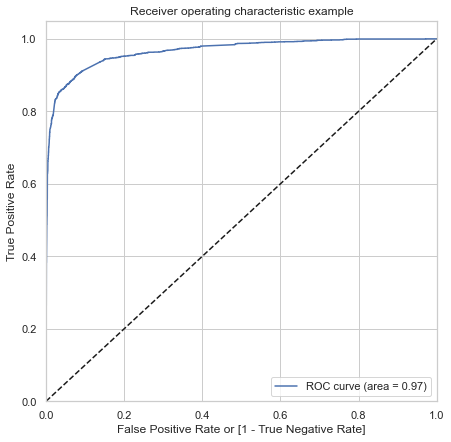

In [117]:
draw_roc(y_train_pred_final.Converted, y_train_pred_final.Converted_prob)

### Finding Optimal Cut off Point

In [118]:
# Let's create columns with different probability cutoffs 
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Converted_prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

,Lead ID,Converted,Converted_prob,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,5428,0,0.219845,0,1,1,1,0,0,0,0,0,0,0
1,8583,1,0.994160,1,1,1,1,1,1,1,1,1,1,1
2,4637,0,0.008799,0,1,0,0,0,0,0,0,0,0,0
3,4468,0,0.117789,0,1,1,0,0,0,0,0,0,0,0
4,2058,0,0.081338,0,1,0,0,0,0,0,0,0,0,0


In [119]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = confusion_matrix(y_train_pred_final.Converted, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.371212  1.000000  0.000000
0.1   0.1  0.826080  0.960921  0.746475
0.2   0.2  0.885719  0.940078  0.853627
0.3   0.3  0.913604  0.900999  0.921046
0.4   0.4  0.916989  0.880591  0.938477
0.5   0.5  0.921986  0.860617  0.958216
0.6   0.6  0.922631  0.838906  0.972058
0.7   0.7  0.910703  0.787668  0.983338
0.8   0.8  0.904417  0.764221  0.987183
0.9   0.9  0.884913  0.701259  0.993335


<Figure size 864x432 with 0 Axes>

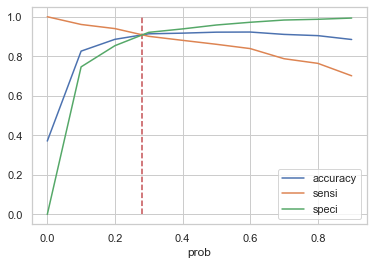

In [120]:
# Let's plot accuracy sensitivity and specificity for various probabilities.
plt.figure(figsize = (12,6))
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.vlines(x=0.28,ymax = 1.0,ymin=0.0,color='r',linestyle='--')
plt.show()

In [121]:
#### From the curve above, 0.28 is the optimum point to take it as a cutoff probability.

y_train_pred_final['final_predicted'] = y_train_pred_final.Converted_prob.map( lambda x: 1 if x > 0.28 else 0)

y_train_pred_final.head()

,Lead ID,Converted,Converted_prob,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
0,5428,0,0.219845,0,1,1,1,0,0,0,0,0,0,0,0
1,8583,1,0.994160,1,1,1,1,1,1,1,1,1,1,1,1
2,4637,0,0.008799,0,1,0,0,0,0,0,0,0,0,0,0
3,4468,0,0.117789,0,1,1,0,0,0,0,0,0,0,0,0
4,2058,0,0.081338,0,1,0,0,0,0,0,0,0,0,0,0


In [122]:
#Assigning Lead Score
y_train_pred_final['Lead_Score'] = y_train_pred_final.Converted_prob.map( lambda x: round(x*100))

y_train_pred_final.head()

,Lead ID,Converted,Converted_prob,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted,Lead_Score
0,5428,0,0.219845,0,1,1,1,0,0,0,0,0,0,0,0,22
1,8583,1,0.994160,1,1,1,1,1,1,1,1,1,1,1,1,99
2,4637,0,0.008799,0,1,0,0,0,0,0,0,0,0,0,0,1
3,4468,0,0.117789,0,1,1,0,0,0,0,0,0,0,0,0,12
4,2058,0,0.081338,0,1,0,0,0,0,0,0,0,0,0,0,8


In [123]:
# Let's check the overall accuracy.
accuracy_score(y_train_pred_final.Converted, y_train_pred_final.final_predicted)

0.9124758220502901

In [124]:
confusion2 = confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.final_predicted )
confusion2

array([[3583,  318],
       [ 225, 2078]], dtype=int64)

In [125]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [126]:
# Let's see the sensitivity of our logistic regression model
print("Sensitivity of the logistic regression model is:  ",TP / float(TP+FN))

Sensitivity of the logistic regression model is:   0.9023013460703431


In [127]:
# Let us calculate specificity
print("Specificity of the logistic regression model is: ",TN / float(TN+FP))

Specificity of the logistic regression model is:  0.9184824403998975


In [128]:
# Calculate false postive rate
print("False positive rate:",FP/ float(TN+FP))

# Positive predictive value 
print("Positive Predictive rate:",TP / float(TP+FP))

# Negative predictive value
print("Negative Predictive rate:",TN / float(TN+ FN))

False positive rate: 0.08151755960010254
Positive Predictive rate: 0.8672787979966611
Negative Predictive rate: 0.9409138655462185


In [129]:
#classification report
print(classification_report(y_train_pred_final.Converted, y_train_pred_final.final_predicted ))

              precision    recall  f1-score   support

           0       0.94      0.92      0.93      3901
           1       0.87      0.90      0.88      2303

    accuracy                           0.91      6204
   macro avg       0.90      0.91      0.91      6204
weighted avg       0.91      0.91      0.91      6204



__Summary__
 
 - Accuracy = 91.25%
 - Sensitivity : 90.23%
 - Specificity : 91.85%
 - Precision = 87%
 - Recall = 90%
 - f1-score = 88%

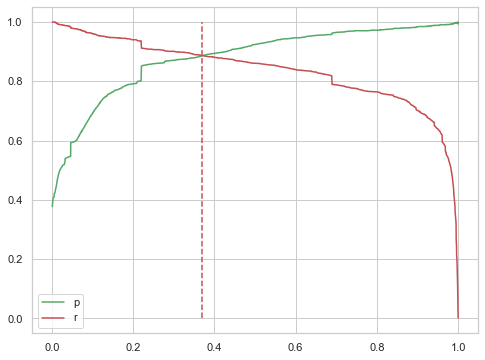

In [161]:
##precision or recall tradeoff
p, r, thresholds = precision_recall_curve(y_train_pred_final.Converted, y_train_pred_final.Converted_prob)
plt.figure(figsize = (8,6))
plt.plot(thresholds, p[:-1], "g-", label="p")
plt.plot(thresholds, r[:-1], "r-", label="r")
plt.legend(loc="lower left")
plt.vlines(x=0.37,ymax = 1.0,ymin=0.0,color='r',linestyle='--')
plt.show()

__Precision and Recall are traded off at 0.37.<br>
Therefore, it is safe to assume that any Prospect Lead with a Conversion Probability of more than 37% qualifies as a hot Lead.__

## 7. Making predictions on the test set 

In [131]:
#Making predictions on the test set
X_test[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']] = scale.transform(X_test[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']])

X_test.head()

,Do Not Email,TotalVisits,Total Time Spent on Website,Page Views Per Visit,A free copy of Mastering The Interview,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Others,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Social Media,Lead Source_Welingak Website,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Opened,Last Activity_Form Submitted on Website,Last Activity_Olark Chat Conversation,Last Activity_Others,Last Activity_Page Visited on Website,Last Activity_SMS Sent,Specialization_Business Administration,Specialization_E-Business,Specialization_International Business,Specialization_Management,Specialization_Media and Advertising,Specialization_Others,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Travel and Tourism,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,Tags_Closed by Horizzon,Tags_Graduation in progress,Tags_In confusion whether part time or DLP,Tags_Interested in full time MBA,Tags_Interested in Next batch,Tags_Interested in other courses,Tags_Lateral student,Tags_Lost,Tags_No phone number,Tags_Not Interested/Not Eligible,Tags_Others,Tags_Recognition issue (DEC approval),Tags_Shall take in the next coming month,Tags_Still Thinking,Tags_Try Calling again,Tags_University not recognized,Tags_Want to take admission but has financial problems,Tags_Will revert after reading the email,Tags_in touch with EINS,City_Other Cities,City_Other Cities of Maharashtra,City_Other Metro Cities,City_Thane & Outskirts,City_Tier II Cities,Last Notable Activity_Email Opened,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Other,Last Notable Activity_Page Visited on Website,Last Notable Activity_SMS Sent
8786,0,-1.071483,-0.871984,-1.184151,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
7813,0,-0.043681,-0.375183,0.390849,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0
2405,0,1.326721,0.121618,0.653349,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1
7246,0,-0.043681,-0.508937,0.390849,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
5366,0,0.984121,0.515238,-0.134151,1,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0


In [132]:
X_test = X_test[cols]
X_test.head()

,Total Time Spent on Website,Lead Origin_Lead Add Form,Lead Source_Olark Chat,Lead Source_Others,Lead Source_Welingak Website,Last Activity_SMS Sent,Tags_Closed by Horizzon,Tags_Lost,Tags_No phone number,Tags_Others,Tags_Will revert after reading the email,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation
8786,-0.871984,1,0,0,1,0,0,0,0,1,0,1,0
7813,-0.375183,0,0,0,0,0,0,0,0,0,0,1,0
2405,0.121618,0,0,0,0,1,0,0,0,0,1,0,0
7246,-0.508937,0,1,0,0,0,0,0,0,1,0,1,0
5366,0.515238,0,0,0,0,0,0,0,0,0,0,1,0


In [133]:
#Adding constant
X_test_sm = sm.add_constant(X_test)

In [134]:
#Making Predicition on test set
y_test_pred = res.predict(X_test_sm)
y_test_pred[:10]

8786    0.734386
7813    0.002274
2405    0.993857
7246    0.067348
5366    0.005958
3924    0.046427
3349    0.012550
916     0.010850
7732    0.070307
1703    0.065325
dtype: float64

In [135]:
# Converting y_pred to a dataframe
y_pred_df = pd.DataFrame(y_test_pred)

In [136]:
y_pred_df.head()

,0
8786,0.734386
7813,0.002274
2405,0.993857
7246,0.067348
5366,0.005958


In [137]:
# Converting y_test to dataframe
y_test_df = pd.DataFrame(y_test)

# Putting CustID to index
y_test_df['Lead ID'] = y_test_df.index

In [138]:
# Removing index for both dataframes to append them side by side 
y_pred_df.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)

In [139]:
# Appending y_test_df and y_pred_1
y_pred_final = pd.concat([y_test_df, y_pred_df],axis=1)
y_pred_final.head()

,Converted,Lead ID,0
0,1,8786,0.734386
1,0,7813,0.002274
2,1,2405,0.993857
3,0,7246,0.067348
4,0,5366,0.005958


In [140]:
# Renaming the column 
y_pred_final= y_pred_final.rename(columns={ 0 : 'Converted_prob'})

In [141]:
# Rearranging the columns
y_pred_final = y_pred_final.reindex(['Lead ID','Converted','Converted_prob'], axis=1)

In [142]:
# Let's see the head of y_pred_final
y_pred_final.head()

,Lead ID,Converted,Converted_prob
0,8786,1,0.734386
1,7813,0,0.002274
2,2405,1,0.993857
3,7246,0,0.067348
4,5366,0,0.005958


In [143]:
# Creating new column "Lead Score" with 1to100 using conversion rates
y_pred_final['Lead_Score'] = y_pred_final.Converted_prob.map( lambda x: round(x*100))
# Let's see the head
y_pred_final.head()

,Lead ID,Converted,Converted_prob,Lead_Score
0,8786,1,0.734386,73
1,7813,0,0.002274,0
2,2405,1,0.993857,99
3,7246,0,0.067348,7
4,5366,0,0.005958,1


In [144]:
#Taking 0.37 as the cutoff using precision recall tradeoff
y_pred_final['final_predicted'] = y_pred_final.Converted_prob.map(lambda x: 1 if x > 0.37 else 0)

In [145]:
y_pred_final.head()

,Lead ID,Converted,Converted_prob,Lead_Score,final_predicted
0,8786,1,0.734386,73,1
1,7813,0,0.002274,0,0
2,2405,1,0.993857,99,1
3,7246,0,0.067348,7,0
4,5366,0,0.005958,1,0


In [146]:
# Let's check the overall accuracy.
print("Model Accuracy on Test data is ",accuracy_score(y_pred_final.Converted, y_pred_final.final_predicted))

Model Accuracy on Test data is  0.9206468597216999


In [147]:
confusion2 = confusion_matrix(y_pred_final.Converted, y_pred_final.final_predicted )
confusion2

array([[1530,   97],
       [ 114,  918]], dtype=int64)

In [148]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [149]:
# Let's see the sensitivity of our logistic regression model
print("Sensitivity of the model on test data is:",TP / float(TP+FN))

Sensitivity of the model on test data is: 0.8895348837209303


In [150]:
# Let us calculate specificity
print("Specificity of the model on test data is:",TN / float(TN+FP))

Specificity of the model on test data is: 0.9403810694529809


In [151]:
#classification report
print(classification_report(y_pred_final.Converted, y_pred_final.final_predicted))

              precision    recall  f1-score   support

           0       0.93      0.94      0.94      1627
           1       0.90      0.89      0.90      1032

    accuracy                           0.92      2659
   macro avg       0.92      0.91      0.92      2659
weighted avg       0.92      0.92      0.92      2659



## 8. Final Observation:

Let us compare the values obtained for Train & Test:

__Train Data:__
 - Accuracy = 91.25%
 - Sensitivity : 90.23%
 - Specificity : 91.85%
 - Precision = 87%
 - Recall = 90%

__Test Data:__
 - Accuracy : 92.06%
 - Sensitivity : 88.95%
 - Specificity : 94.04%
 - Precision : 90%
 - Recall : 89%

__The Model seems to be fairly good at predicting the Conversion Rate. We should be able to assist the education organisation in selecting the Hot Leads or the most promising Leads.__

## 9. Conclusion

Let us observe the potential leads & their lead conversion rate

__Summary of the leads & their Lead scores__

In [152]:
## Let us concatinate predictiona made on test & train dataset
cols1 = y_pred_final.columns
all_leads = pd.concat([y_train_pred_final[cols1],y_pred_final])

# Let us observe the behaviour of leads for various original attributes of the dataframe
all_leads = pd.merge(all_leads,df.reset_index(), left_on = 'Lead ID',right_on = 'index', how = 'left').drop(['Converted_y','index','Lead ID'],axis =1)
all_leads.rename(columns = {'Converted_x':'Converted'}, inplace = True)

# Changing the position of `Lead Number` column
col_position = all_leads.columns.tolist()
col_position.insert(0, col_position.pop(col_position.index('Lead Number')))
all_leads = all_leads.reindex(columns = col_position)
all_leads.head()

,Lead Number,Converted,Converted_prob,Lead_Score,final_predicted,Lead Origin,Lead Source,Do Not Email,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,What is your current occupation,Tags,City,A free copy of Mastering The Interview,Last Notable Activity
0,608267,0,0.219845,22,0,API,Olark Chat,No,0,0,0.0,Email Opened,Others,Unemployed,Others,Mumbai,No,Email Opened
1,584274,1,0.994160,99,1,Landing Page Submission,Google,No,5,1538,2.5,Email Opened,Management,Unemployed,Will revert after reading the email,Thane & Outskirts,No,Email Opened
2,615279,0,0.008799,1,0,Landing Page Submission,Direct Traffic,No,2,69,2.0,Email Link Clicked,Management,Unemployed,Try Calling again,Mumbai,Yes,Email Link Clicked
3,616756,0,0.117789,12,0,Landing Page Submission,Direct Traffic,No,3,349,3.0,Email Opened,Management,Unemployed,Others,Mumbai,Yes,Email Opened
4,639772,0,0.081338,8,0,Landing Page Submission,Direct Traffic,No,7,151,1.4,Email Opened,"Banking, Investment And Insurance",Unemployed,Others,Mumbai,No,Email Opened


In [153]:
all_leads.shape

(8863, 18)

__Identifying Hot Leads with conversion rate more than 80% (Lead Score)__<br><br>
Let us observe the relation between lead score, converted & the variables selected in our final regression model.

In [154]:
Hot_leads = all_leads.loc[all_leads['Lead_Score'] > 80,:].sort_values(by = 'Lead_Score', ascending = False)
Hot_leads.head()

,Lead Number,Converted,Converted_prob,Lead_Score,final_predicted,Lead Origin,Lead Source,Do Not Email,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,What is your current occupation,Tags,City,A free copy of Mastering The Interview,Last Notable Activity
6679,587979,1,0.996511,100,1,Landing Page Submission,Google,No,4,794,4.0,SMS Sent,Management,Unemployed,Will revert after reading the email,Mumbai,No,SMS Sent
2048,636208,1,0.995639,100,1,Landing Page Submission,Direct Traffic,No,3,686,3.0,SMS Sent,Rural and Agribusiness,Unemployed,Will revert after reading the email,Other Cities of Maharashtra,Yes,SMS Sent
6750,603637,1,0.999617,100,1,Landing Page Submission,Direct Traffic,No,3,1385,3.0,Email Opened,Management,Student,Closed by Horizzon,Other Cities of Maharashtra,No,Email Opened
2077,586542,1,0.995842,100,1,API,Olark Chat,No,0,0,0.0,SMS Sent,Business Administration,Unemployed,Will revert after reading the email,Mumbai,No,SMS Sent
3690,635552,1,0.999169,100,1,Landing Page Submission,Direct Traffic,No,5,1487,5.0,SMS Sent,Management,Student,Will revert after reading the email,Mumbai,Yes,SMS Sent


In [155]:
Hot_leads.shape

(2626, 18)

__Relationship of the leads with the final variables of regression model__

In [156]:
# concatenating columns from FINAL regression model and lead score on train & test Data

#concatenating predictions on train & test data
cols2 = y_pred_final.columns
lead_score = pd.concat([y_train_pred_final[cols2],y_pred_final[cols2]])

# concatenating Variables selected in our final regression model
lead_score = pd.merge(lead_score,df_new[cols].reset_index(), left_on = 'Lead ID',right_on = 'index', how = 'left')
lead_score = lead_score.sort_values(by = 'Lead_Score', ascending = False)
lead_score.drop('index',axis = 1,inplace = True)
lead_score.head()

,Lead ID,Converted,Converted_prob,Lead_Score,final_predicted,Total Time Spent on Website,Lead Origin_Lead Add Form,Lead Source_Olark Chat,Lead Source_Others,Lead Source_Welingak Website,Last Activity_SMS Sent,Tags_Closed by Horizzon,Tags_Lost,Tags_No phone number,Tags_Others,Tags_Will revert after reading the email,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation
1753,3736,1,0.999980,100,1,0,1,0,0,1,1,1,0,0,0,0,1,0
3598,4044,1,0.995842,100,1,0,0,1,0,0,1,0,0,0,0,1,0,0
8313,6778,1,0.998193,100,1,1112,0,0,0,0,1,0,0,0,0,1,0,0
685,5036,1,0.995842,100,1,0,0,1,0,0,1,0,0,0,0,1,0,0
7775,1991,1,0.999773,100,1,1489,0,0,0,0,1,1,0,0,0,0,1,0


In [157]:
lead_score.shape

(8863, 18)

#### Determining Feature Importance

In [164]:
# To display features with corrsponding coefficients in final model
pd.options.display.float_format = '{:.2f}'.format
new_params = res.params[1:]
new_params

Total Time Spent on Website                      1.09
Lead Origin_Lead Add Form                        1.24
Lead Source_Olark Chat                           1.47
Lead Source_Others                               1.59
Lead Source_Welingak Website                     4.27
Last Activity_SMS Sent                           2.06
Tags_Closed by Horizzon                          9.86
Tags_Lost                                        7.31
Tags_No phone number                            -2.30
Tags_Others                                      2.13
Tags_Will revert after reading the email         6.81
Last Notable Activity_Modified                  -1.76
Last Notable Activity_Olark Chat Conversation   -2.17
dtype: float64

In [165]:
# Relative feature importance
feature_importance = new_params
feature_importance = 100.0 * (feature_importance / feature_importance.max())
feature_importance

Total Time Spent on Website                      11.01
Lead Origin_Lead Add Form                        12.61
Lead Source_Olark Chat                           14.92
Lead Source_Others                               16.11
Lead Source_Welingak Website                     43.26
Last Activity_SMS Sent                           20.90
Tags_Closed by Horizzon                         100.00
Tags_Lost                                        74.09
Tags_No phone number                            -23.27
Tags_Others                                      21.60
Tags_Will revert after reading the email         69.09
Last Notable Activity_Modified                  -17.80
Last Notable Activity_Olark Chat Conversation   -21.99
dtype: float64

In [174]:
# To sort features based on importance
sorted_by_id = np.argsort(feature_importance,kind='quicksort',order='list of str')
sorted_by_id

Total Time Spent on Website                       8
Lead Origin_Lead Add Form                        12
Lead Source_Olark Chat                           11
Lead Source_Others                                0
Lead Source_Welingak Website                      1
Last Activity_SMS Sent                            2
Tags_Closed by Horizzon                           3
Tags_Lost                                         5
Tags_No phone number                              9
Tags_Others                                       4
Tags_Will revert after reading the email         10
Last Notable Activity_Modified                    7
Last Notable Activity_Olark Chat Conversation     6
dtype: int64

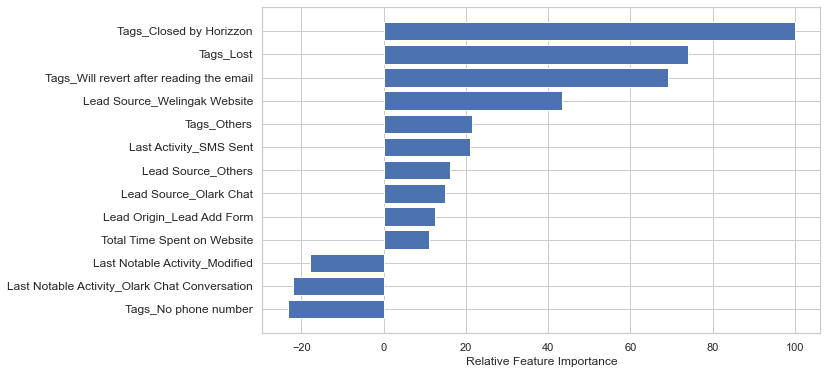

In [175]:
# To plot features with their relative importance
fig = plt.figure(figsize=(10,6))
ax = fig.add_subplot(1, 1, 1)
pos = np.arange(sorted_by_id.shape[0])
ax.barh(pos, feature_importance[sorted_by_id])
ax.set_yticks(pos)
ax.set_yticklabels(np.array(X_train[cols].columns)[sorted_by_id], fontsize=12)
ax.set_xlabel('Relative Feature Importance', fontsize=12) 
plt.show()

### CLOSING STATEMENT <br>
   
 - To maximise conversion and minimise pointless phone calls when the company has "limited time and resources," it should contact "Hot leads," or those leads who have more than 80% of conversion probability..
 - The company should contact all of the "potential leads" when it has "ample resources and time" available. However, since it has plenty of time on its hands, it should also concentrate on clients with lower conversion rates in order to raise the lead conversion rate as a whole.